In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
rc('animation', html='jshtml')

from IPython.display import set_matplotlib_formats

#set_matplotlib_formats("png")
plt.rc("xtick", labelsize=16, top=True,direction="in") #Fontstørrelse på akser, ticks indad
plt.rc("ytick", labelsize=16, right=True, direction="in") #Samme som ovenstående men for y
plt.rc("axes",grid=True,linewidth=1.3) #Slår grid til, og sætter tykkelsen af plot-spine
plt.rc("grid",ls=":",lw=1) #Sætter gridstyle som ":"
plt.rc('font', size=16) #Font og fontstørrelse
plt.rc("figure",figsize=(5,3),dpi=250) #Figurstørrelse og opløsningen på graferne
plt.rc("ytick.major",width=1.3) #Sætter tykkelsen på yticks
plt.rc("xtick.major",width=1.3) #Sætter tykkelsen på xticks

In [51]:
data_z = [  # m
    0.070, 0.570 ,1.060
]

# Ploariseer filter is on

# Wavelenghts are for MID-IR and in 1/cm
energy_of_beam_lambda_3355_1_cm = [  # mW
    [
        33, 34, 34, 30, 30, 30, 32, 30, 29, 24, 20, 18, 17, 14, 10, 7, 5, 4, 1, 0, 0, 0, 0, 0
    ],
    [
        28, 28, 30, 28, 25, 26, 22, 20, 17, 14, 12, 12, 12, 10, 9, 7, 6, 5, 4, 2, 1, 0, 0, 0
    ],
    [
        23, 19, 18, 14, 16, 14, 11, 11, 12, 11, 13, 12, 10, 10, 7, 7, 7, 6, 4, 4, 3, 1, 0, 0 
    ]
]

energy_of_beam_lambda_3864_1_cm = [  # mW
    [
        20, 20, 19, 21, 21, 19, 15, 15, 19, 17, 13, 12, 13, 12, 8, 8, 5, 3, 1, 0, 0, 0 
    ],
    [
        20, 17, 14, 15, 16, 15, 14, 14, 14, 11, 10, 7, 7, 7, 5, 4, 3, 3, 2, 2, 1, 0, 0
    ],
    [
        10, 9, 9, 10, 7, 6, 5, 7, 4, 4, 6, 5, 5, 3, 4, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0
    ]
]

# one round from 0 to 0 is 0.5 mm we will do with this step size 
# Starting from 0 mm on the thorlabs thing
# m from the top of the laser beam
position_of_blade = np.arange(0, 10, 0.5)

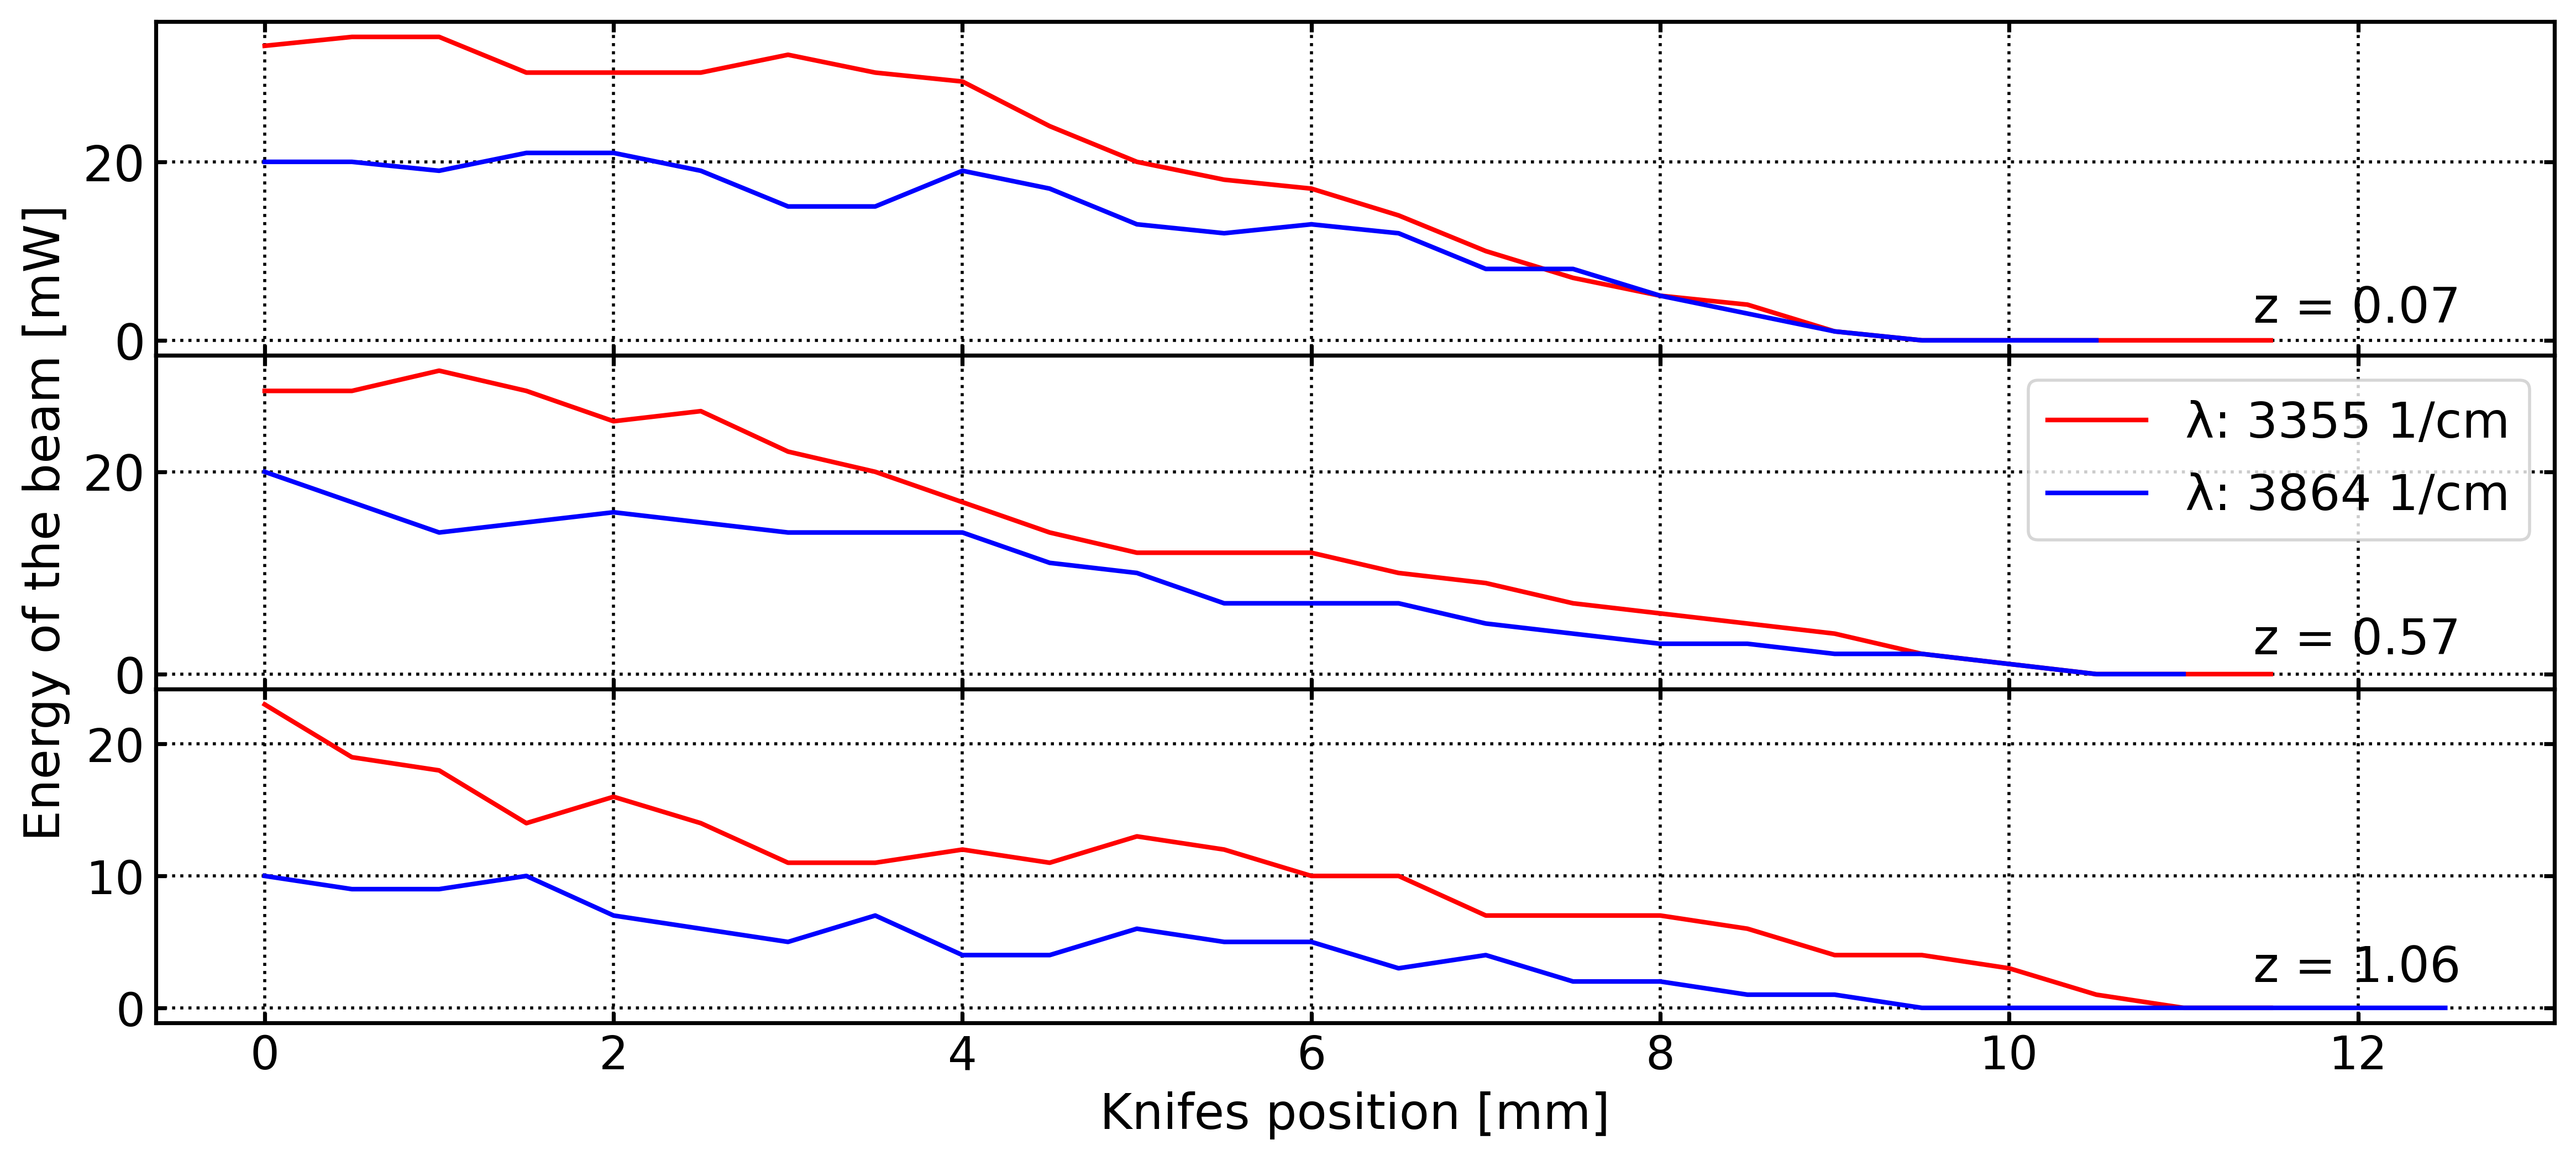

In [52]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 6), dpi=400)

tick_options = ["-", "--", "-."]
i = 0
for z_0, e_3355, e_3864, lines, ax in zip(data_z, energy_of_beam_lambda_3355_1_cm, 
                               energy_of_beam_lambda_3864_1_cm,
                               tick_options, axs
                              ):
    
    e_3355_e = np.array(e_3355)
    energy_joule_3355 = e_3355_e
    position_of_blade3355 = np.arange(0, len(energy_joule_3355) / 2, 0.5)
    ax.plot(position_of_blade3355, energy_joule_3355, label=f"λ: 3355 1/cm",
            color="red", # linestyle=lines
            )
    
    e_3864_e = np.array(e_3864)                           
    energy_joule_3864 = e_3864_e
    position_of_blade3864 = np.arange(0, len(energy_joule_3864) / 2, 0.5)
    ax.plot(position_of_blade3864, energy_joule_3864, 
             label=f"λ: 3864 1/cm",
             color="blue", # linestyle=lines
            )
    ax.grid(which="major",color="black",linewidth='1',linestyle=":")
    plt.tick_params(direction="in", top=True, right=True, labelsize=15)
    
    ax.text(11.4, 2, f"z = {z_0}")
    
    if i == 1:
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1)) 
    i += 1

#ax.grid(which="major",color="black",linewidth='1',linestyle=":")
#plt.tick_params(direction="in", top=True, right=True, labelsize=15) 
    plt.tick_params(direction="in", top=True, right=True, labelsize=15)

#plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))     
#plt.ylabel("Energy of the beam with offsets [mJ]")
#plt.xlabel("Position of the knife [mm]")
plt.subplots_adjust(hspace=0, wspace=0.1)
axs[2].set_xlabel("Knifes position [mm]")
axs[1].set_ylabel("Energy of the beam [mW]")
plt.show()            

In [101]:
# From reading the graph
beam_diameter_0_r =  9.5 - 3
beam_diameter_1_r = 10.5 - 2.5
beam_diameter_2_r = 11 - 2

# From reading the graph
beam_diameter_0_b = 9.5 - 4
beam_diameter_1_b = 10.5 - 4
beam_diameter_2_b = 9.5 - 2.5

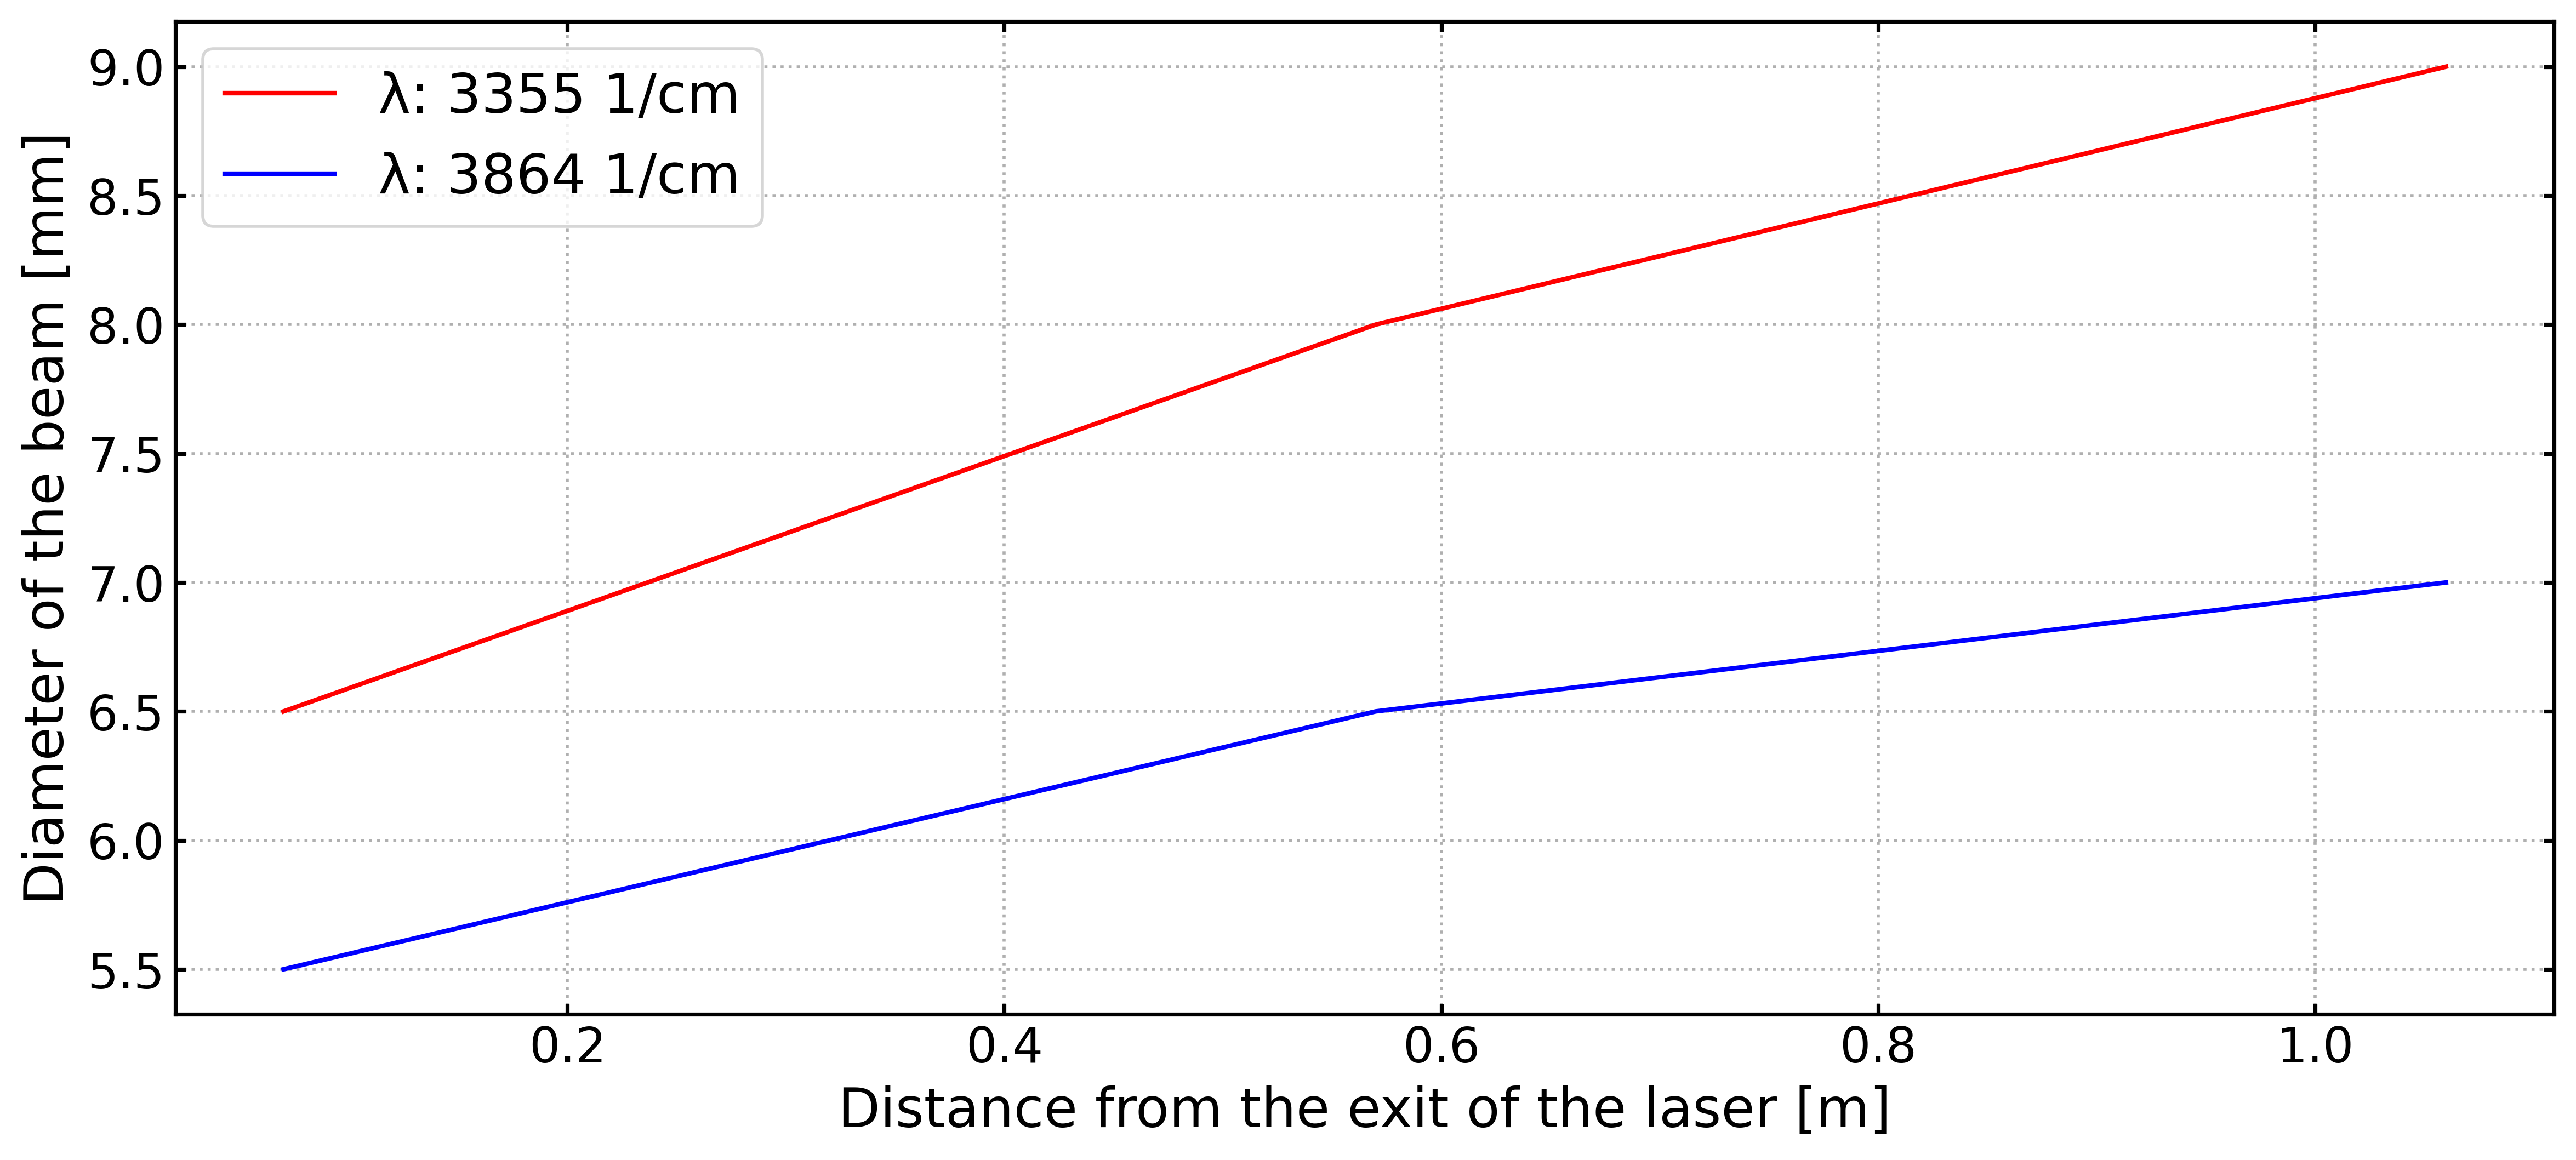

In [107]:
fig, axs = plt.subplots(figsize=(14, 6), dpi=400)

plt.plot(data_z, [beam_diameter_0_r, beam_diameter_1_r, beam_diameter_2_r], 
         color='red', label=f"λ: 3355 1/cm")
plt.plot(data_z, [beam_diameter_0_b, beam_diameter_1_b, beam_diameter_2_b], 
         color='blue', label=f"λ: 3864 1/cm")
plt.xlabel("Distance from the exit of the laser [m]")
plt.ylabel("Diameter of the beam [mm]")
plt.legend()
plt.show()

Fitted total energy (E_total): 68.61531766426228
Fitted beam waist (w): 7.455565157226935


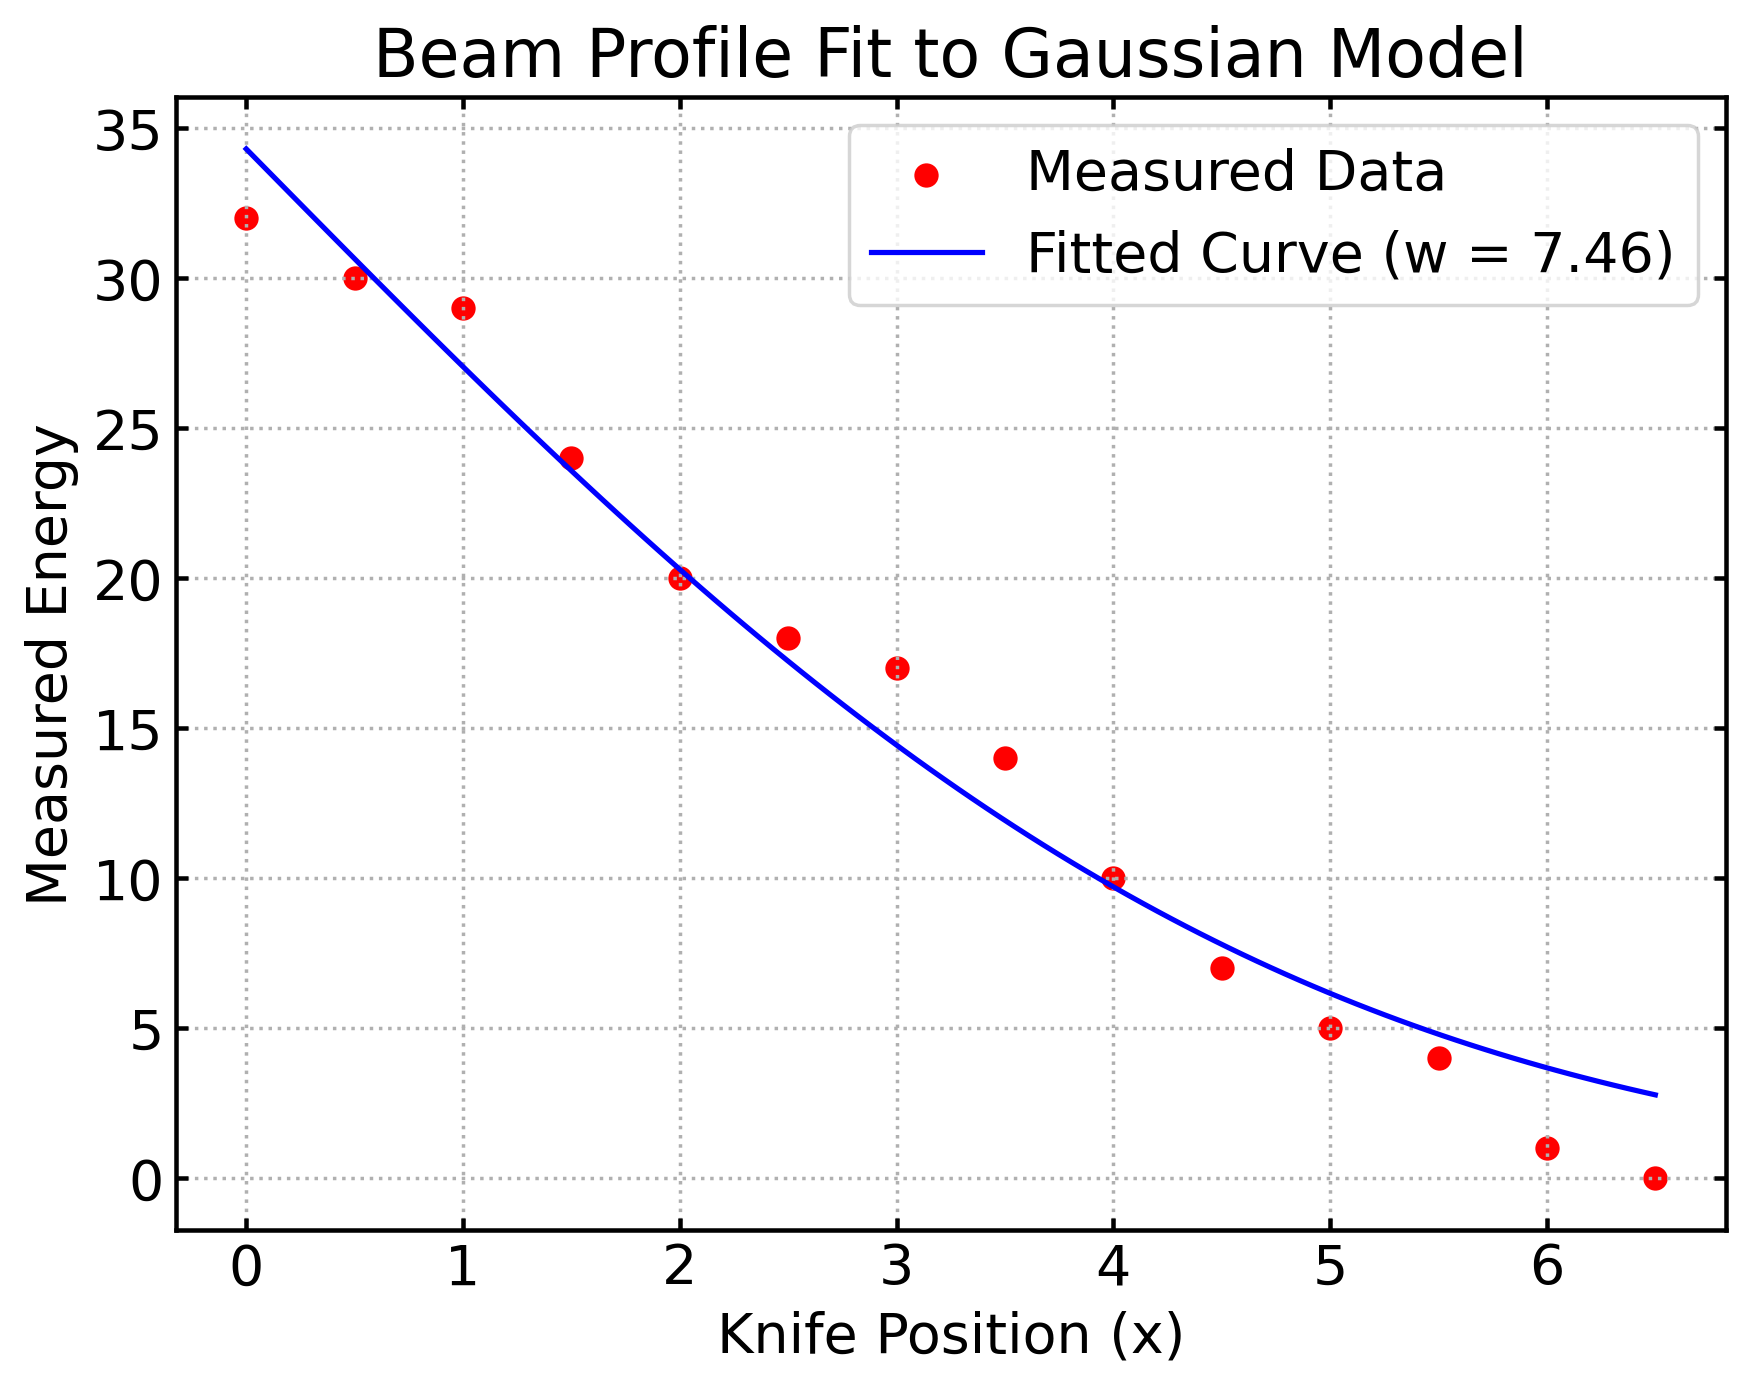

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Example data: Replace these with your actual data
energy = np.array([#33, 34, 34, 30, 30, 30, 
    32, 30, 29, 24, 20, 18, 17, 14, 10, 7, 5, 4, 1, 0, 
                   #0, 0, 0, 0
])
# Measured energy at each knife position
x = np.arange(0, len(energy) / 2, 0.5) 
# Knife positions (in mm or other units)

# Define the Gaussian beam energy function
def gaussian_energy(x, E_total, w):
    # This is the energy passing through, based on the knife position x
    return E_total * 0.5 * (1 - erf(np.sqrt(2) * x / w))

# Initial guesses for total energy and beam waist (can adjust based on your data)
initial_guesses = [max(energy), 1.0]

# Perform the curve fitting
params, covariance = curve_fit(gaussian_energy, x, energy, p0=initial_guesses)

# Extract the fit parameters
E_total_fit, w_fit = params

# Generate fitted curve for visualization
x_fit = np.linspace(min(x), max(x), 100)
energy_fit = gaussian_energy(x_fit, E_total_fit, w_fit)

# Print the fitted parameters
print(f"Fitted total energy (E_total): {E_total_fit}")
print(f"Fitted beam waist (w): {w_fit}")

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x, energy, label='Measured Data', color='red')
plt.plot(x_fit, energy_fit, label=f'Fitted Curve (w = {w_fit:.2f})', color='blue')
plt.xlabel('Knife Position (x)')
plt.ylabel('Measured Energy')
plt.title('Beam Profile Fit to Gaussian Model')
plt.legend()
plt.grid(True)
plt.show()


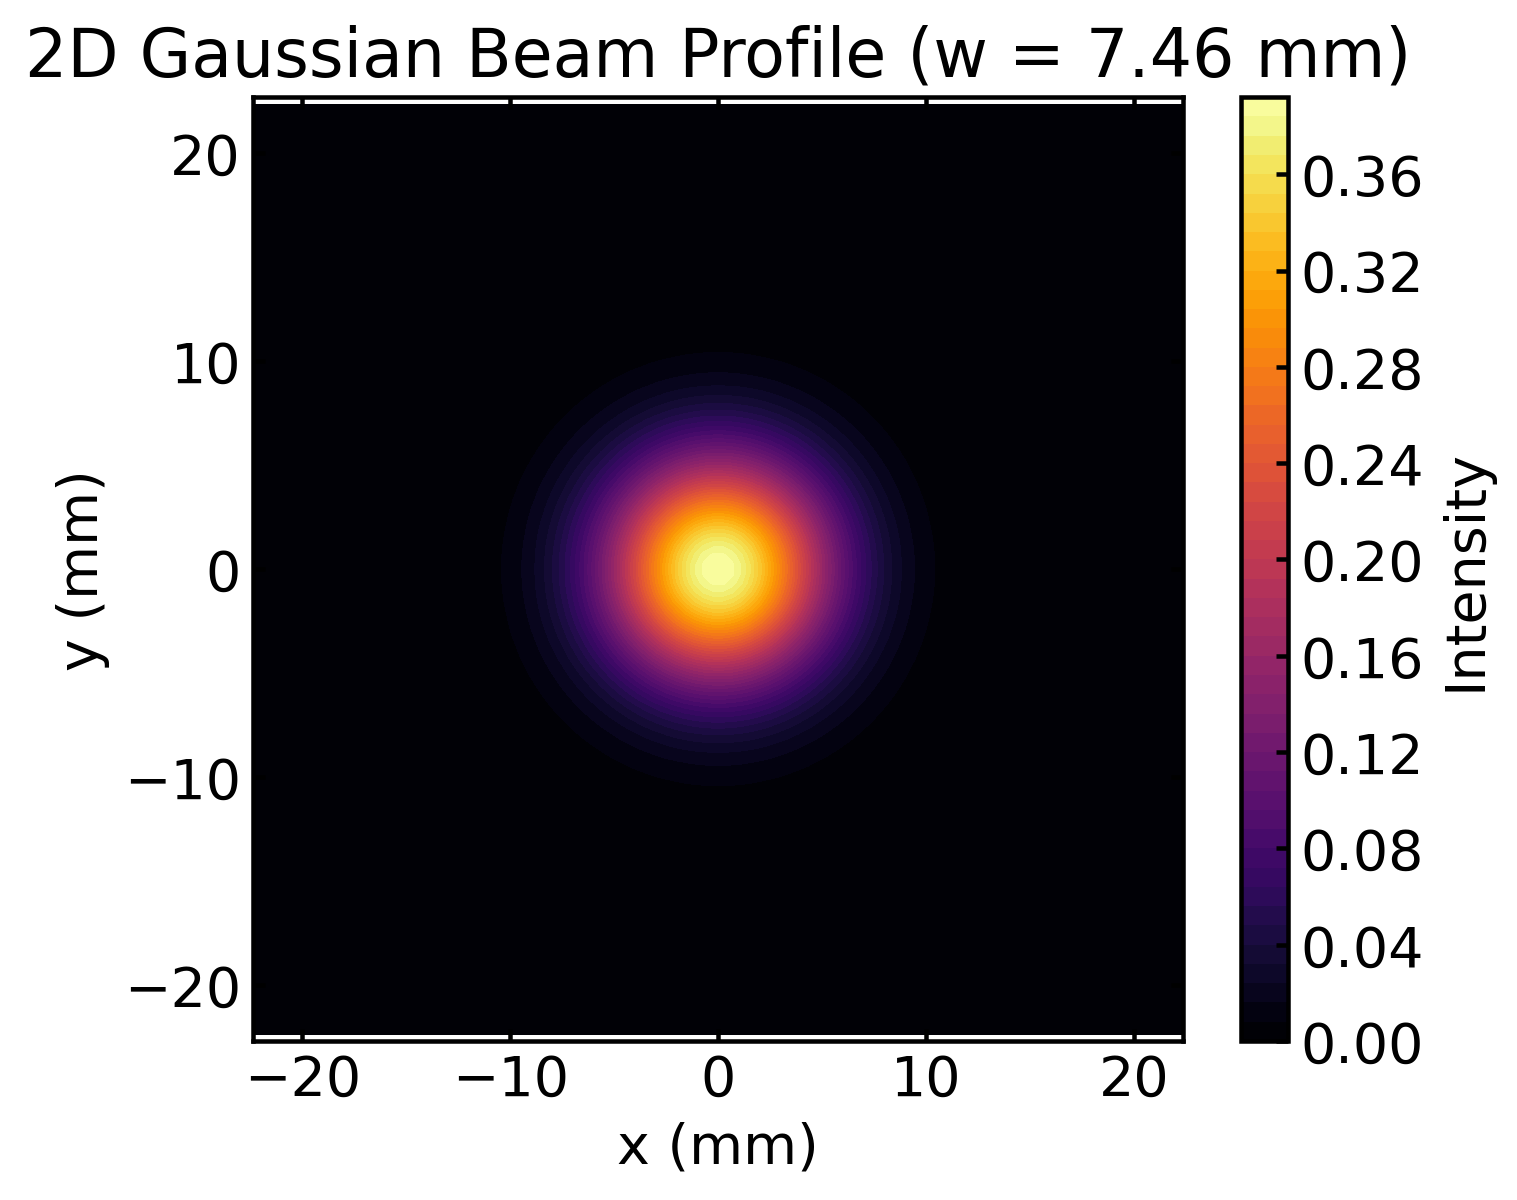

In [13]:

# Define the 2D Gaussian intensity profile function
def gaussian_2d(x, y, I0, w):
    return I0 * np.exp(-2 * (x**2 + y**2) / w**2)

# Generate a 2D grid for plotting
grid_size = 100  # You can adjust this for finer resolution
grid_range = 3 * w_fit  # Define the range in terms of beam waist
x_vals = np.linspace(-grid_range, grid_range, grid_size)
y_vals = np.linspace(-grid_range, grid_range, grid_size)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the intensity at each (x, y) point
I0_fit = E_total_fit / (np.pi * w_fit**2)  # Estimate peak intensity based on energy and waist
intensity_2d = gaussian_2d(X, Y, I0_fit, w_fit)

# Plot the 2D beam profile as a heatmap
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, intensity_2d, levels=50, cmap='inferno')
plt.colorbar(label='Intensity')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title(f'2D Gaussian Beam Profile (w = {w_fit:.2f} mm)')
plt.axis('equal')
plt.grid(False)
plt.show()

Fitted total energy (E_total): 218.66162104576298
Fitted beam waist (w): 7.306829996896425


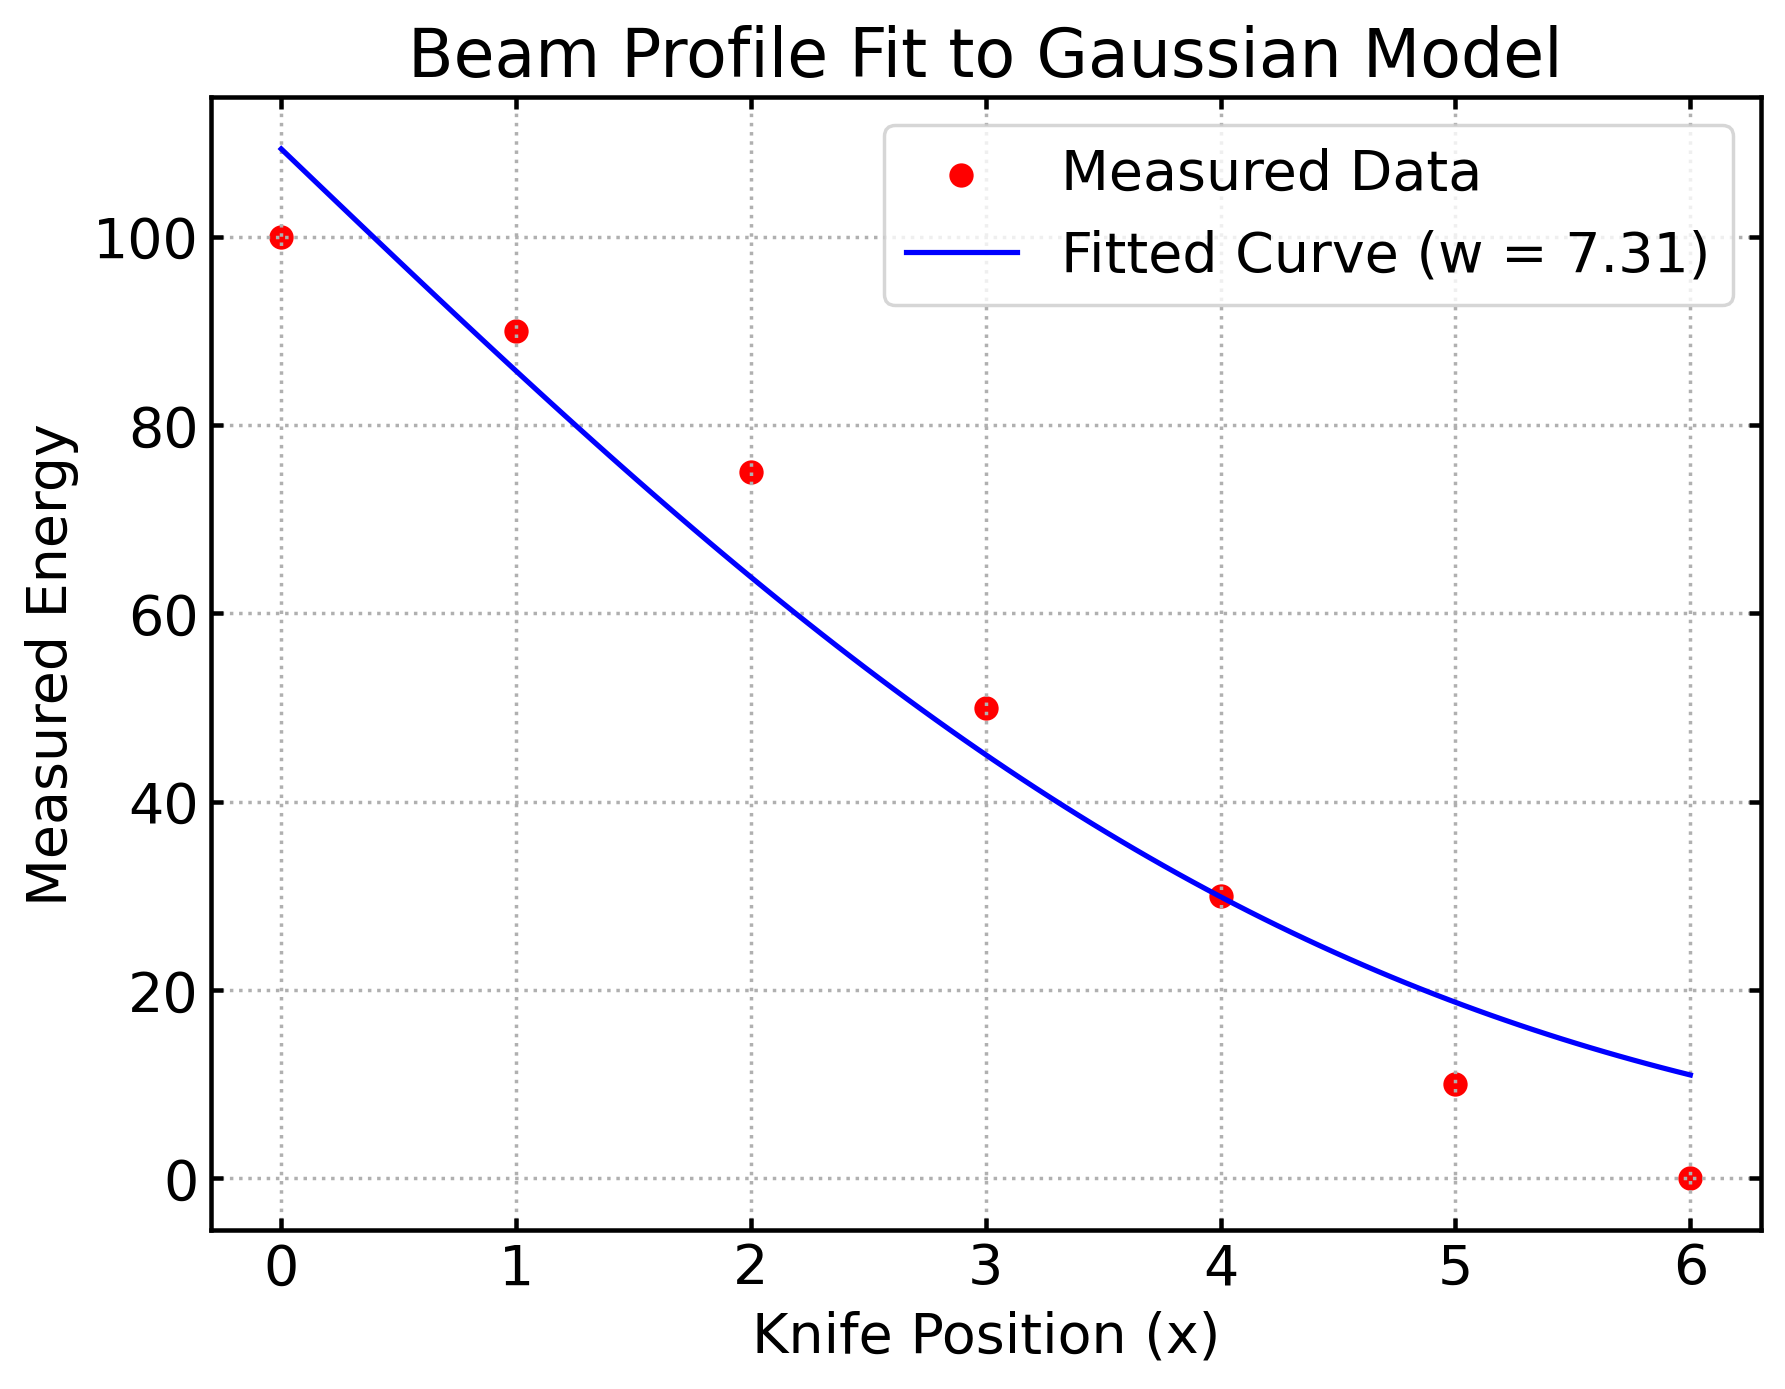

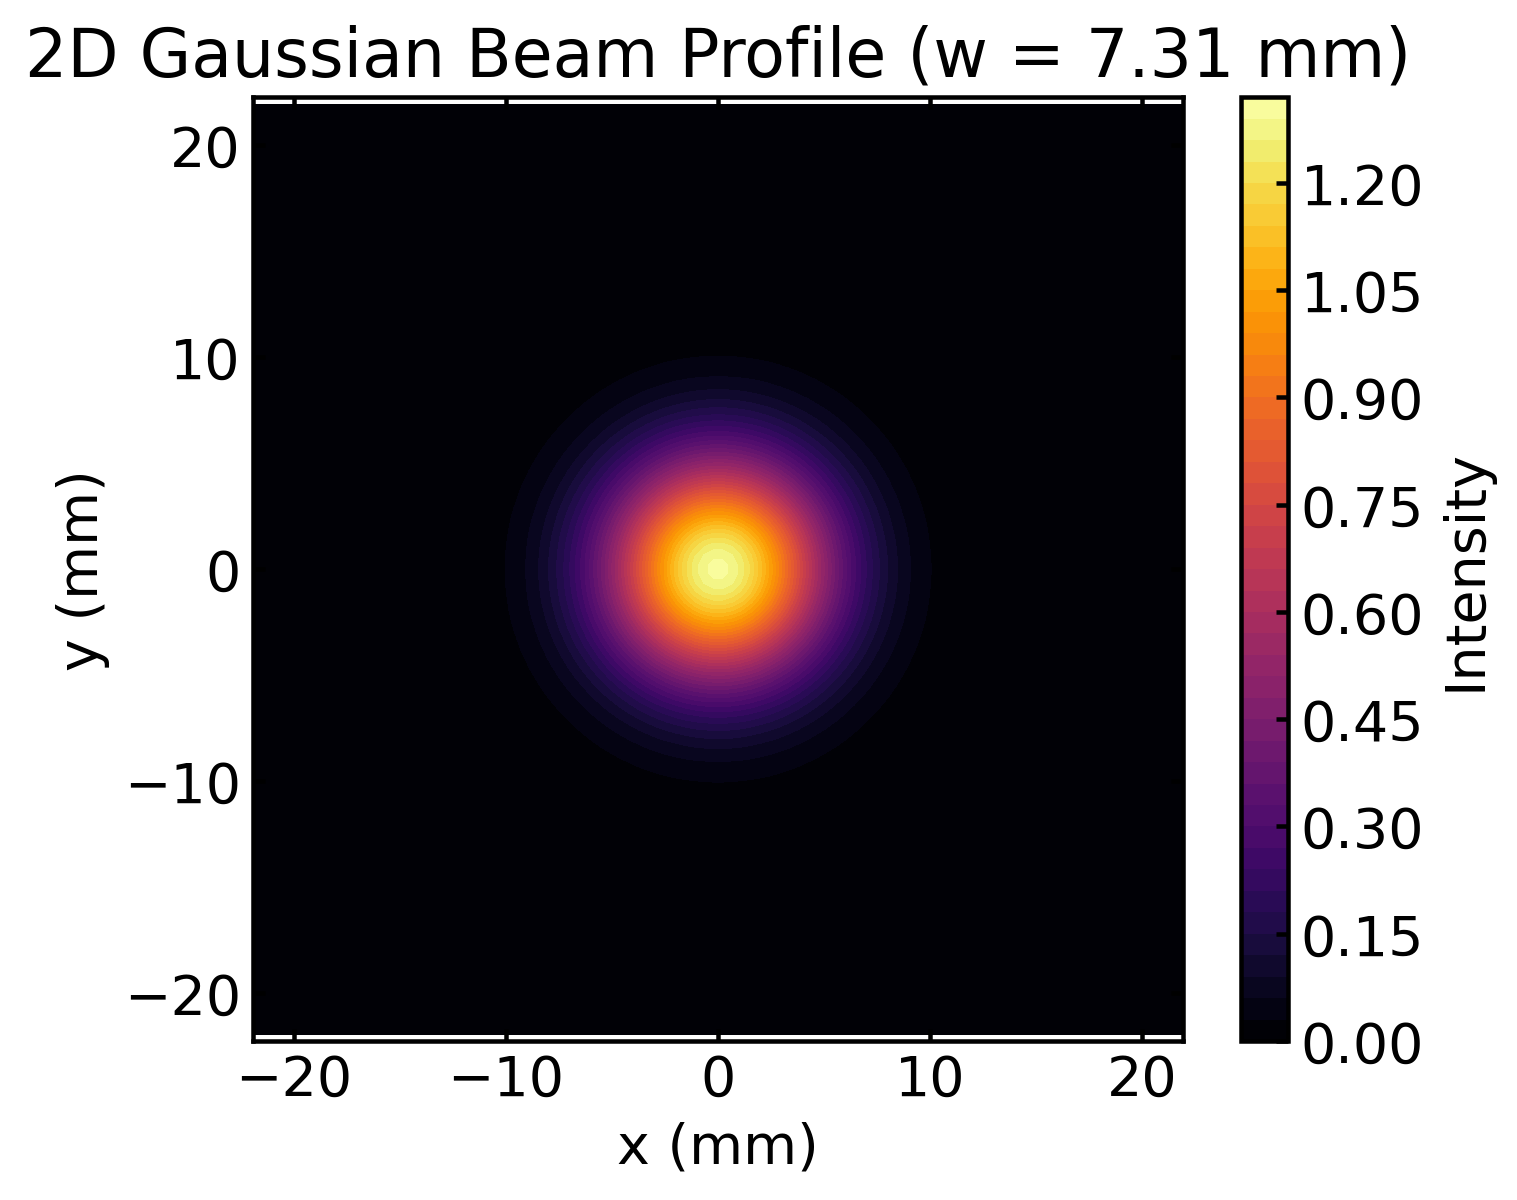

In [7]:

# Example data: Replace these with your actual data
x = np.array([0, 1, 2, 3, 4, 5, 6])  # Knife positions (in mm or other units)
energy = np.array([100, 90, 75, 50, 30, 10, 0])  # Measured energy at each knife position

# Define the Gaussian beam energy function (fitting to error function)
def gaussian_energy(x, E_total, w):
    return E_total * 0.5 * (1 - erf(np.sqrt(2) * x / w))

# Initial guesses for total energy and beam waist
initial_guesses = [max(energy), 1.0]

# Perform the curve fitting
params, covariance = curve_fit(gaussian_energy, x, energy, p0=initial_guesses)

# Extract the fit parameters
E_total_fit, w_fit = params

# Generate fitted curve for visualization
x_fit = np.linspace(min(x), max(x), 100)
energy_fit = gaussian_energy(x_fit, E_total_fit, w_fit)

# Print the fitted parameters
print(f"Fitted total energy (E_total): {E_total_fit}")
print(f"Fitted beam waist (w): {w_fit}")

# Plot the fitted curve vs. measured data
plt.figure(figsize=(8, 6))
plt.scatter(x, energy, label='Measured Data', color='red')
plt.plot(x_fit, energy_fit, label=f'Fitted Curve (w = {w_fit:.2f})', color='blue')
plt.xlabel('Knife Position (x)')
plt.ylabel('Measured Energy')
plt.title('Beam Profile Fit to Gaussian Model')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# Now plot the 2D Gaussian beam profile
# --------------------------------------------

# Define the 2D Gaussian intensity profile function
def gaussian_2d(x, y, I0, w):
    return I0 * np.exp(-2 * (x**2 + y**2) / w**2)

# Generate a 2D grid for plotting
grid_size = 100  # You can adjust this for finer resolution
grid_range = 3 * w_fit  # Define the range in terms of beam waist
x_vals = np.linspace(-grid_range, grid_range, grid_size)
y_vals = np.linspace(-grid_range, grid_range, grid_size)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the intensity at each (x, y) point
I0_fit = E_total_fit / (np.pi * w_fit**2)  # Estimate peak intensity based on energy and waist
intensity_2d = gaussian_2d(X, Y, I0_fit, w_fit)

# Plot the 2D beam profile as a heatmap
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, intensity_2d, levels=50, cmap='inferno')
plt.colorbar(label='Intensity')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title(f'2D Gaussian Beam Profile (w = {w_fit:.2f} mm)')
plt.axis('equal')
plt.grid(False)
plt.show()


Fitted total energy (E_total): 32.7479583169819
Fitted beam waist (w): 4.027539261842861
Fitted offset (x0): 5.923356245002952


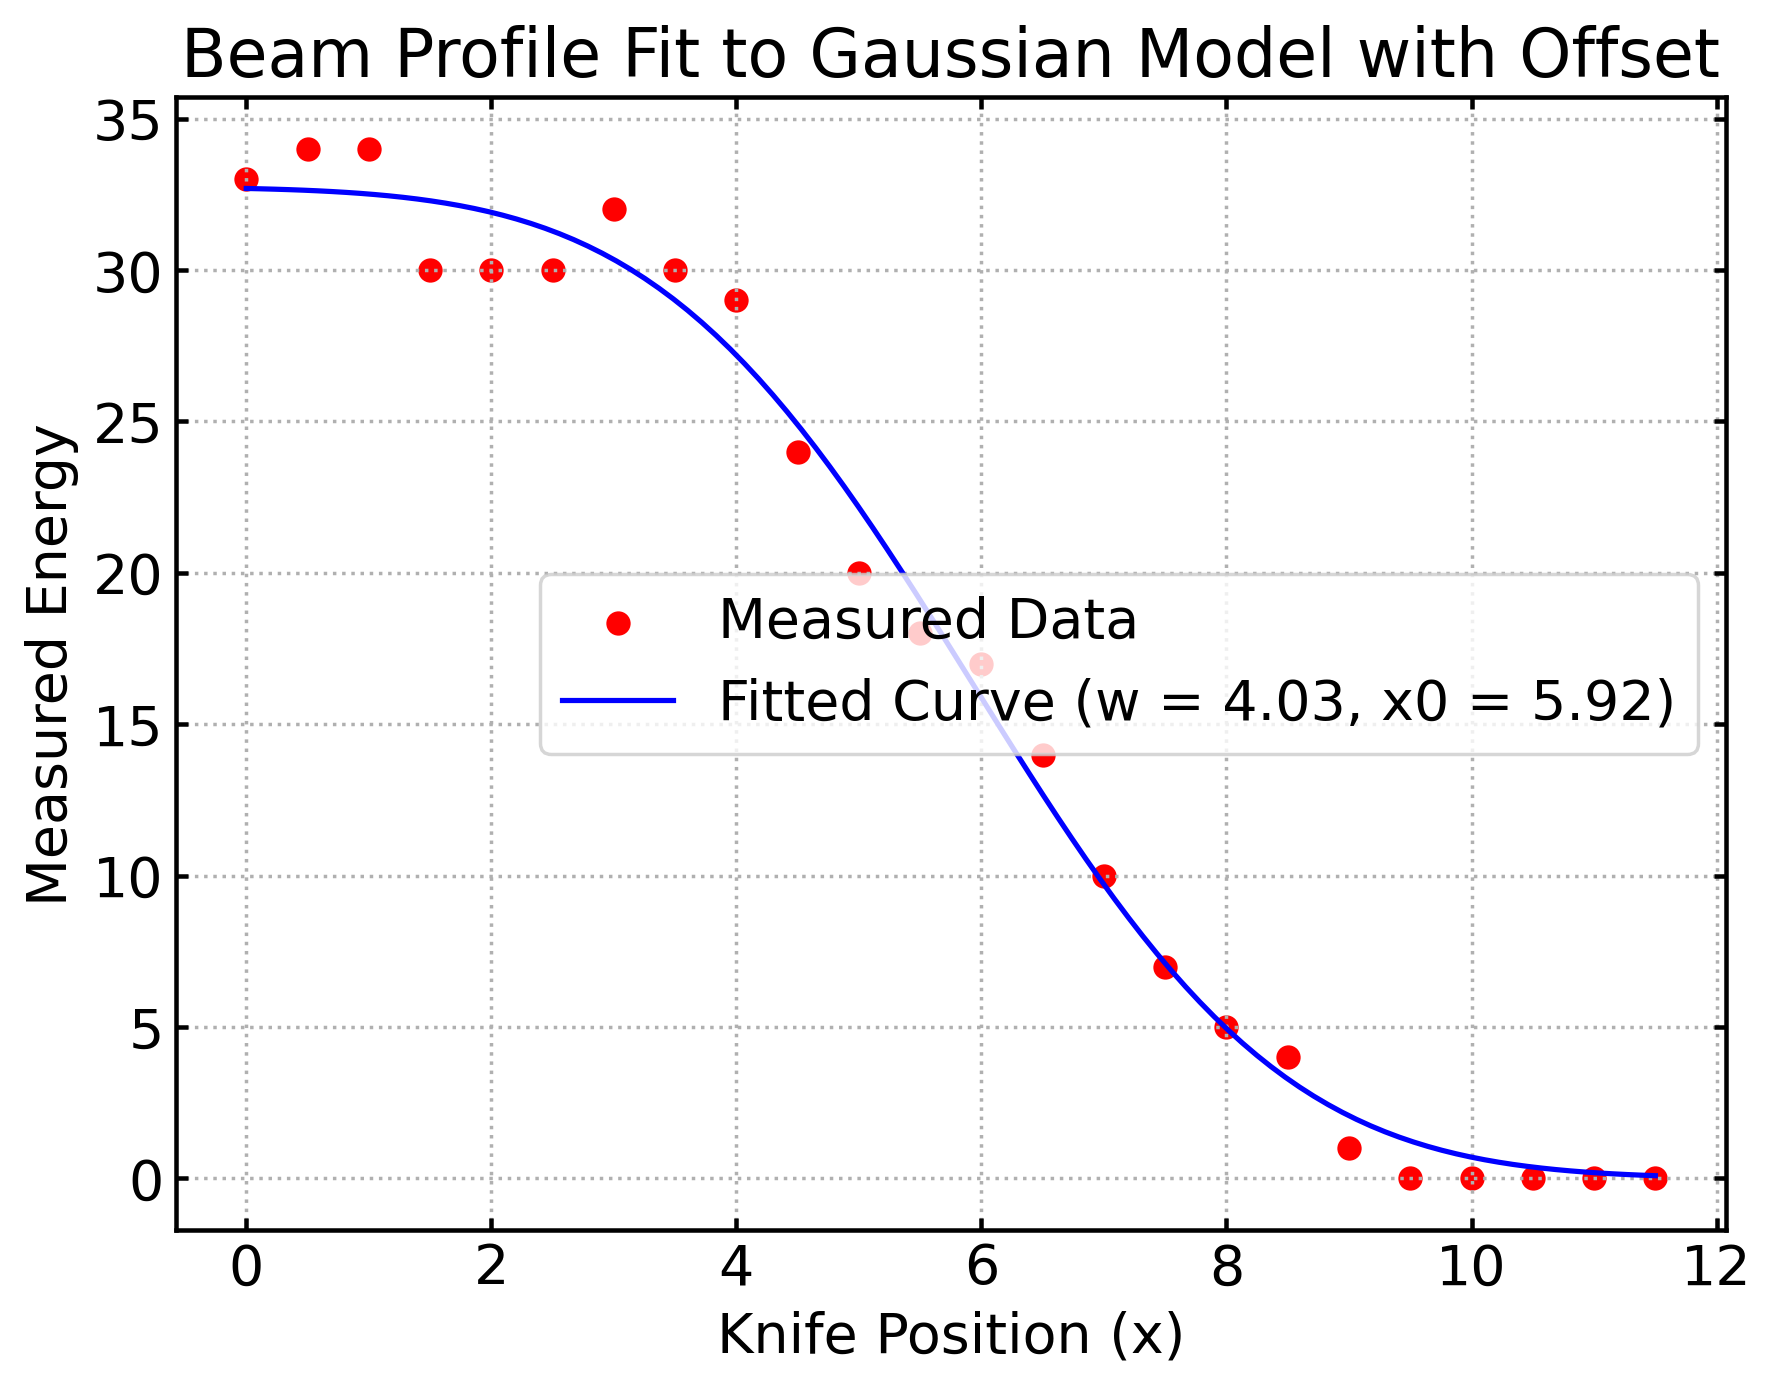

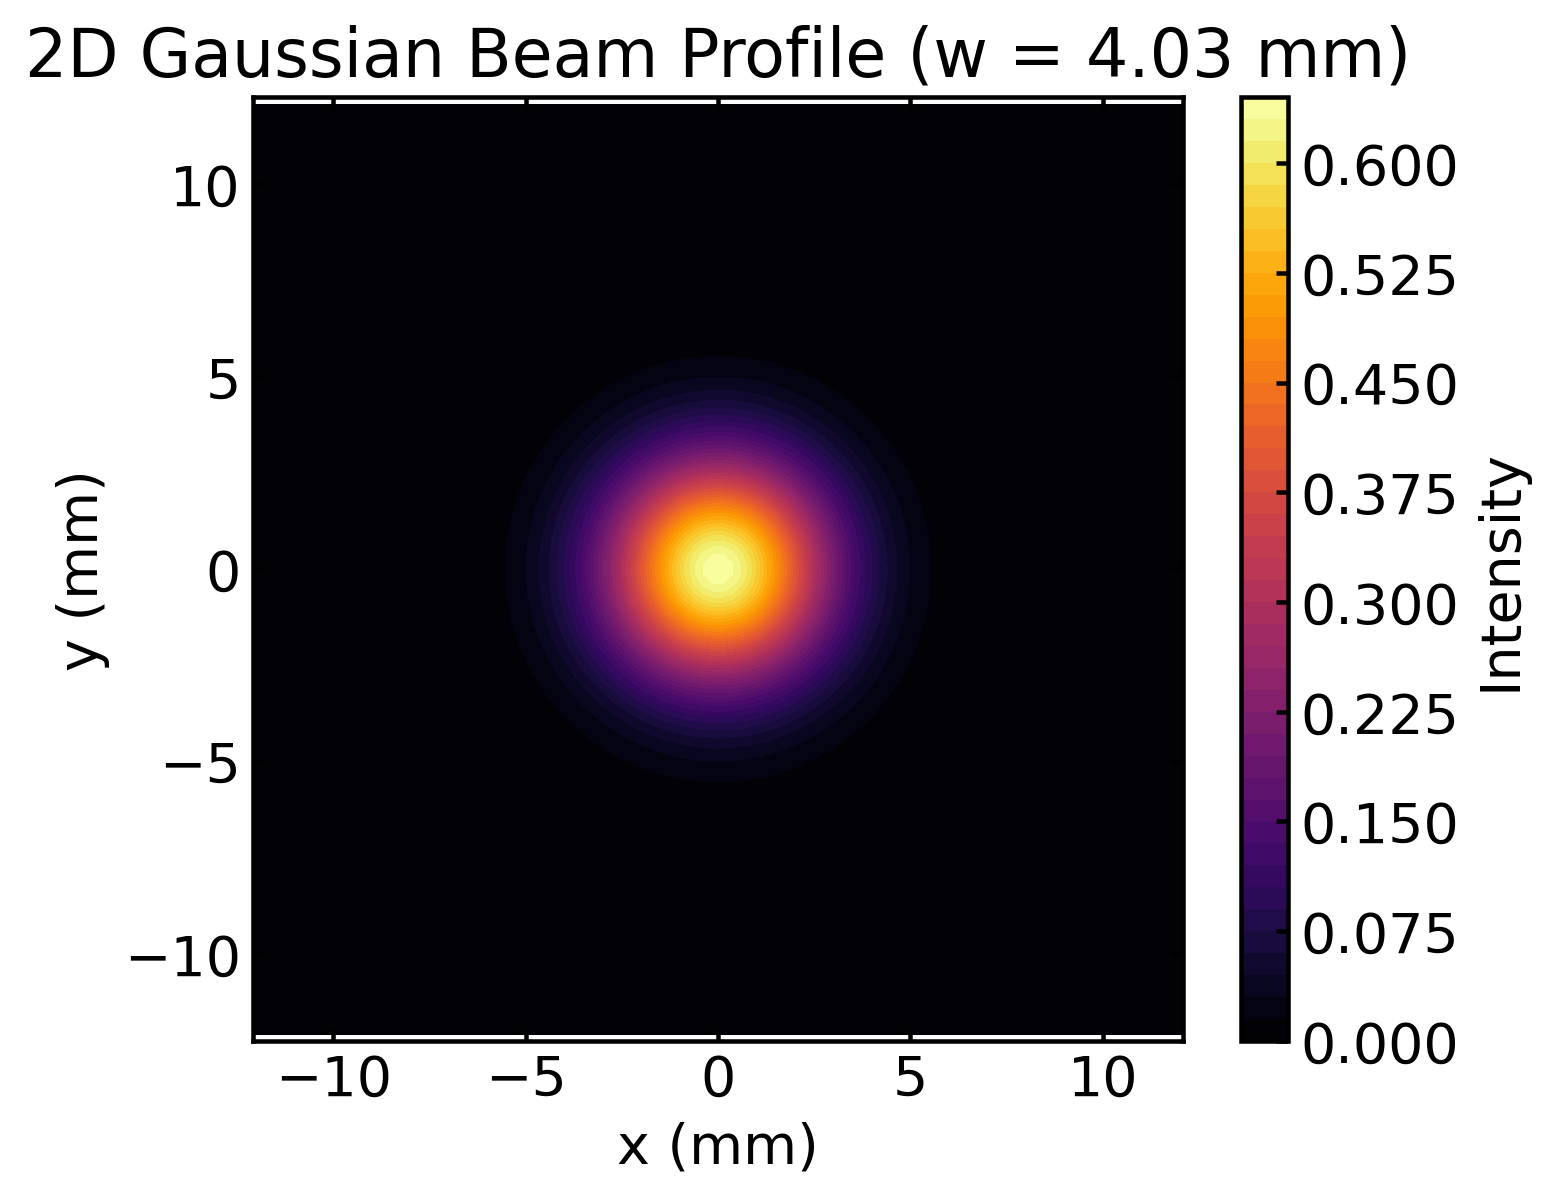

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Example data: Replace these with your actual data
energy = np.array([33, 34, 34, 30, 30, 30, 
    32, 30, 29, 24, 20, 18, 17, 14, 10, 7, 5, 4, 1, 0, 
                   0, 0, 0, 0
])
# Measured energy at each knife position
x = np.arange(0, len(energy) / 2, 0.5) 
# Knife positions (in mm or other units)

# Define the Gaussian beam energy function with an offset
def gaussian_energy_with_offset(x, E_total, w, x0):
    return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

# Initial guesses for total energy, beam waist, and offset
initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

# Perform the curve fitting
params, covariance = curve_fit(gaussian_energy_with_offset, x, energy, p0=initial_guesses)

# Extract the fit parameters
E_total_fit, w_fit, x0_fit = params

# Generate fitted curve for visualization
x_fit = np.linspace(min(x), max(x), 100)
energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

# Print the fitted parameters
print(f"Fitted total energy (E_total): {E_total_fit}")
print(f"Fitted beam waist (w): {w_fit}")
print(f"Fitted offset (x0): {x0_fit}")

# Plot the fitted curve vs. measured data
plt.figure(figsize=(8, 6))
plt.scatter(x, energy, label='Measured Data', color='red')
plt.plot(x_fit, energy_fit, label=f'Fitted Curve (w = {w_fit:.2f}, x0 = {x0_fit:.2f})', color='blue')
plt.xlabel('Knife Position (x)')
plt.ylabel('Measured Energy')
plt.title('Beam Profile Fit to Gaussian Model with Offset')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# Now plot the 2D Gaussian beam profile
# --------------------------------------------

# Define the 2D Gaussian intensity profile function
def gaussian_2d(x, y, I0, w):
    return I0 * np.exp(-2 * (x**2 + y**2) / w**2)

# Generate a 2D grid for plotting
grid_size = 100  # You can adjust this for finer resolution
grid_range = 3 * w_fit  # Define the range in terms of beam waist
x_vals = np.linspace(-grid_range, grid_range, grid_size)
y_vals = np.linspace(-grid_range, grid_range, grid_size)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the intensity at each (x, y) point
I0_fit = E_total_fit / (np.pi * w_fit**2)  # Estimate peak intensity based on energy and waist
intensity_2d = gaussian_2d(X, Y, I0_fit, w_fit)

# Plot the 2D beam profile as a heatmap
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, intensity_2d, levels=50, cmap='inferno')
plt.colorbar(label='Intensity')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title(f'2D Gaussian Beam Profile (w = {w_fit:.2f} mm)')
plt.axis('equal')
plt.grid(False)
plt.show()


Fitted total energy (E_total): 33.48049193755098
Fitted beam waist (w): 7.029782242987033
Fitted offset (x0): 4.390331720086856


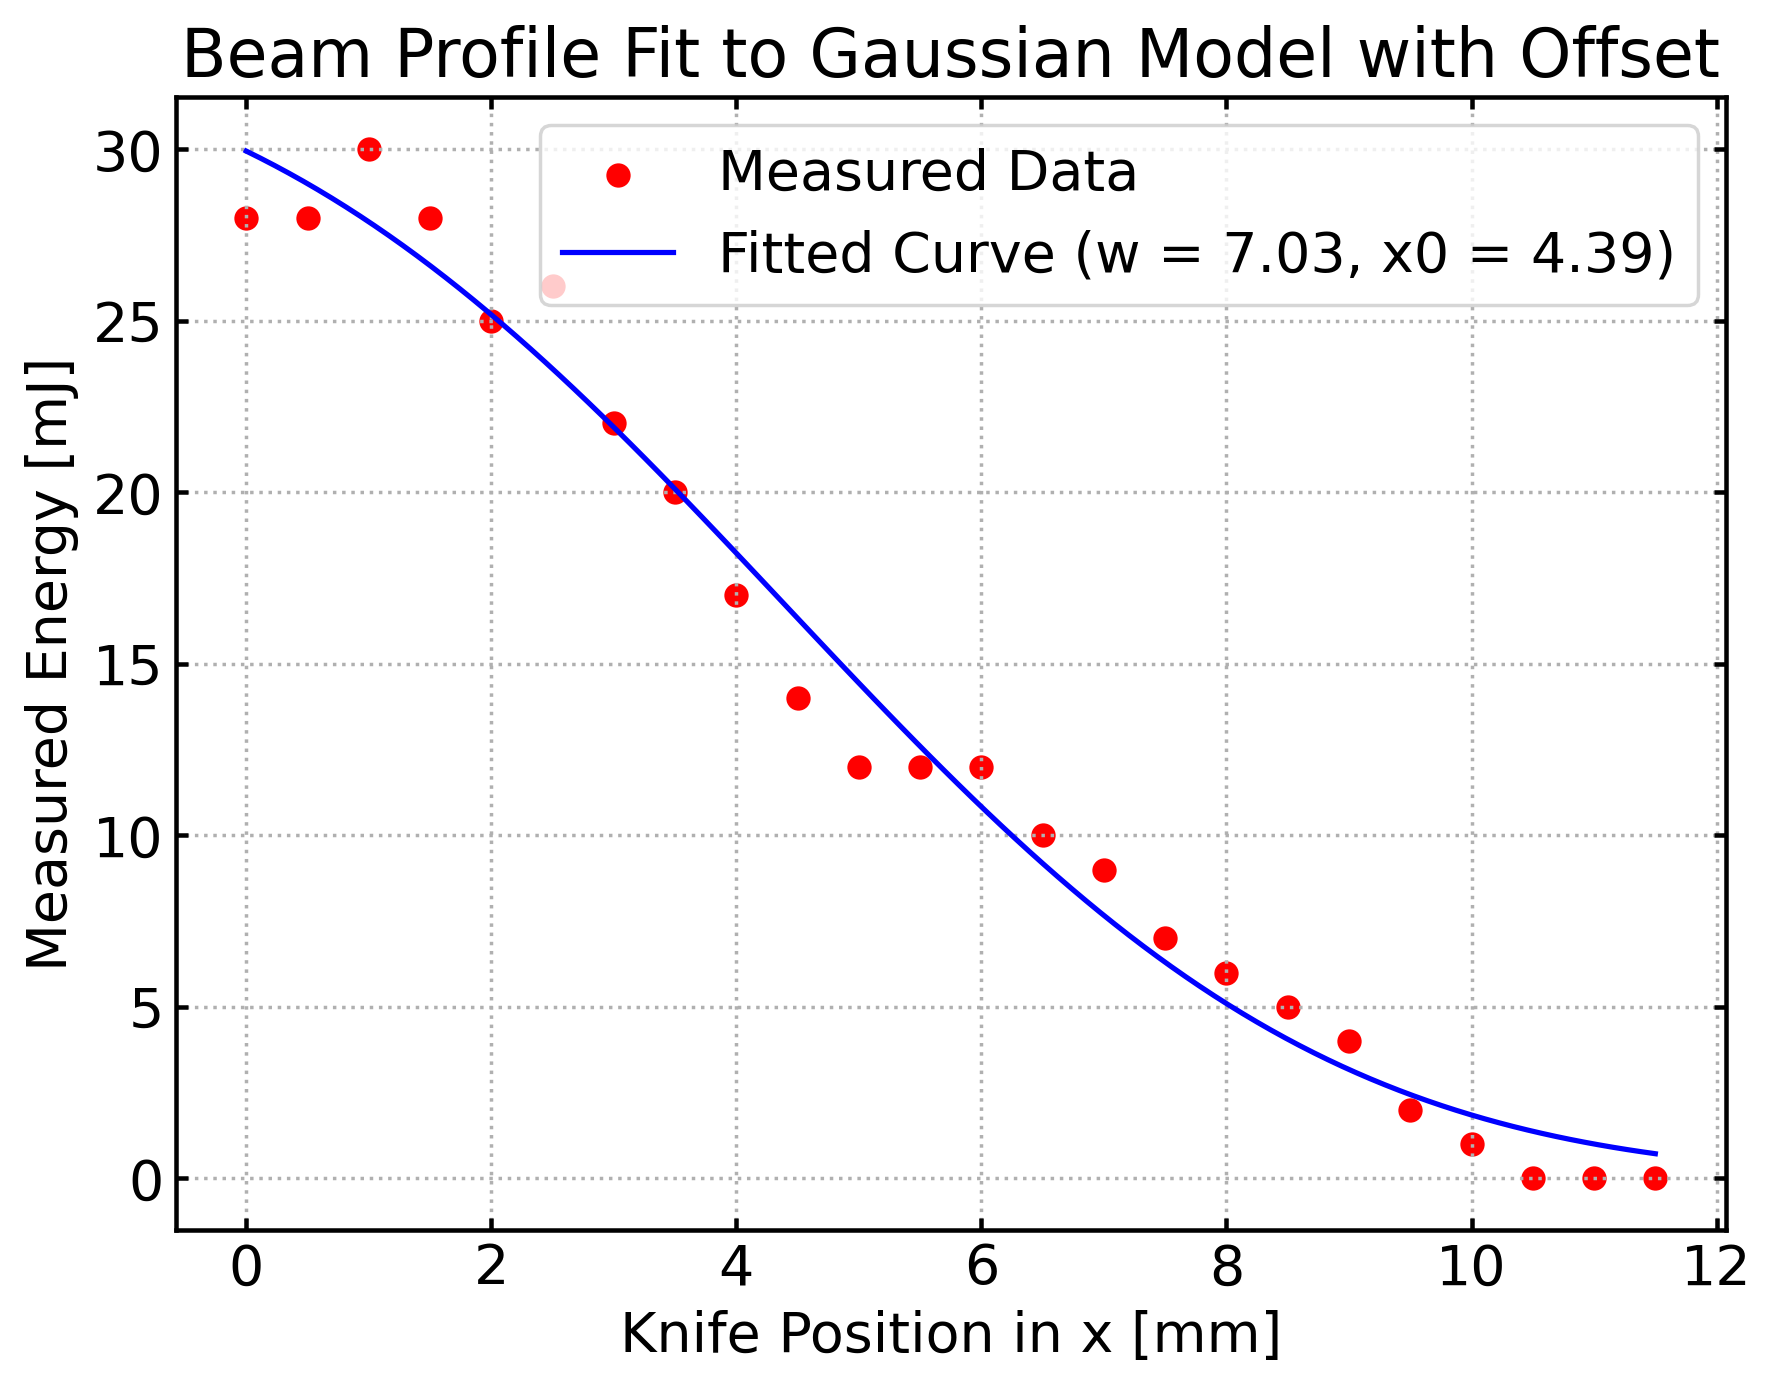

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Example data: Replace these with your actual data
energy = np.array([
    28, 28, 30, 28, 25, 26, 22, 20, 17, 14, 12, 12, 12, 10, 9, 7, 6, 5, 4, 2, 1, 0, 0, 0
])
# Measured energy at each knife position
x = np.arange(0, len(energy) / 2, 0.5) 
# Knife positions (in mm or other units)

# Define the Gaussian beam energy function with an offset
def gaussian_energy_with_offset(x, E_total, w, x0):
    return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

# Initial guesses for total energy, beam waist, and offset
initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

# Perform the curve fitting
params, covariance = curve_fit(gaussian_energy_with_offset, x, energy, p0=initial_guesses)

# Extract the fit parameters
E_total_fit, w_fit, x0_fit = params

# Generate fitted curve for visualization
x_fit = np.linspace(min(x), max(x), 100)
energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

# Print the fitted parameters
print(f"Fitted total energy (E_total): {E_total_fit}")
print(f"Fitted beam waist (w): {w_fit}")
print(f"Fitted offset (x0): {x0_fit}")

# Plot the fitted curve vs. measured data
plt.figure(figsize=(8, 6))
plt.scatter(x, energy, label='Measured Data', color='red')
plt.plot(x_fit, energy_fit, label=f'Fitted Curve (w = {w_fit:.2f}, x0 = {x0_fit:.2f})', color='blue')
plt.xlabel('Knife Position in x [mm]')
plt.ylabel('Measured Energy [mJ]')
plt.title('Beam Profile Fit to Gaussian Model with Offset')
plt.legend()
plt.grid(True)
plt.show()


Fitted total energy (E_total): 28.971254613085556
Fitted beam waist (w): 12.094024654921666
Fitted offset (x0): 2.8123987510080837


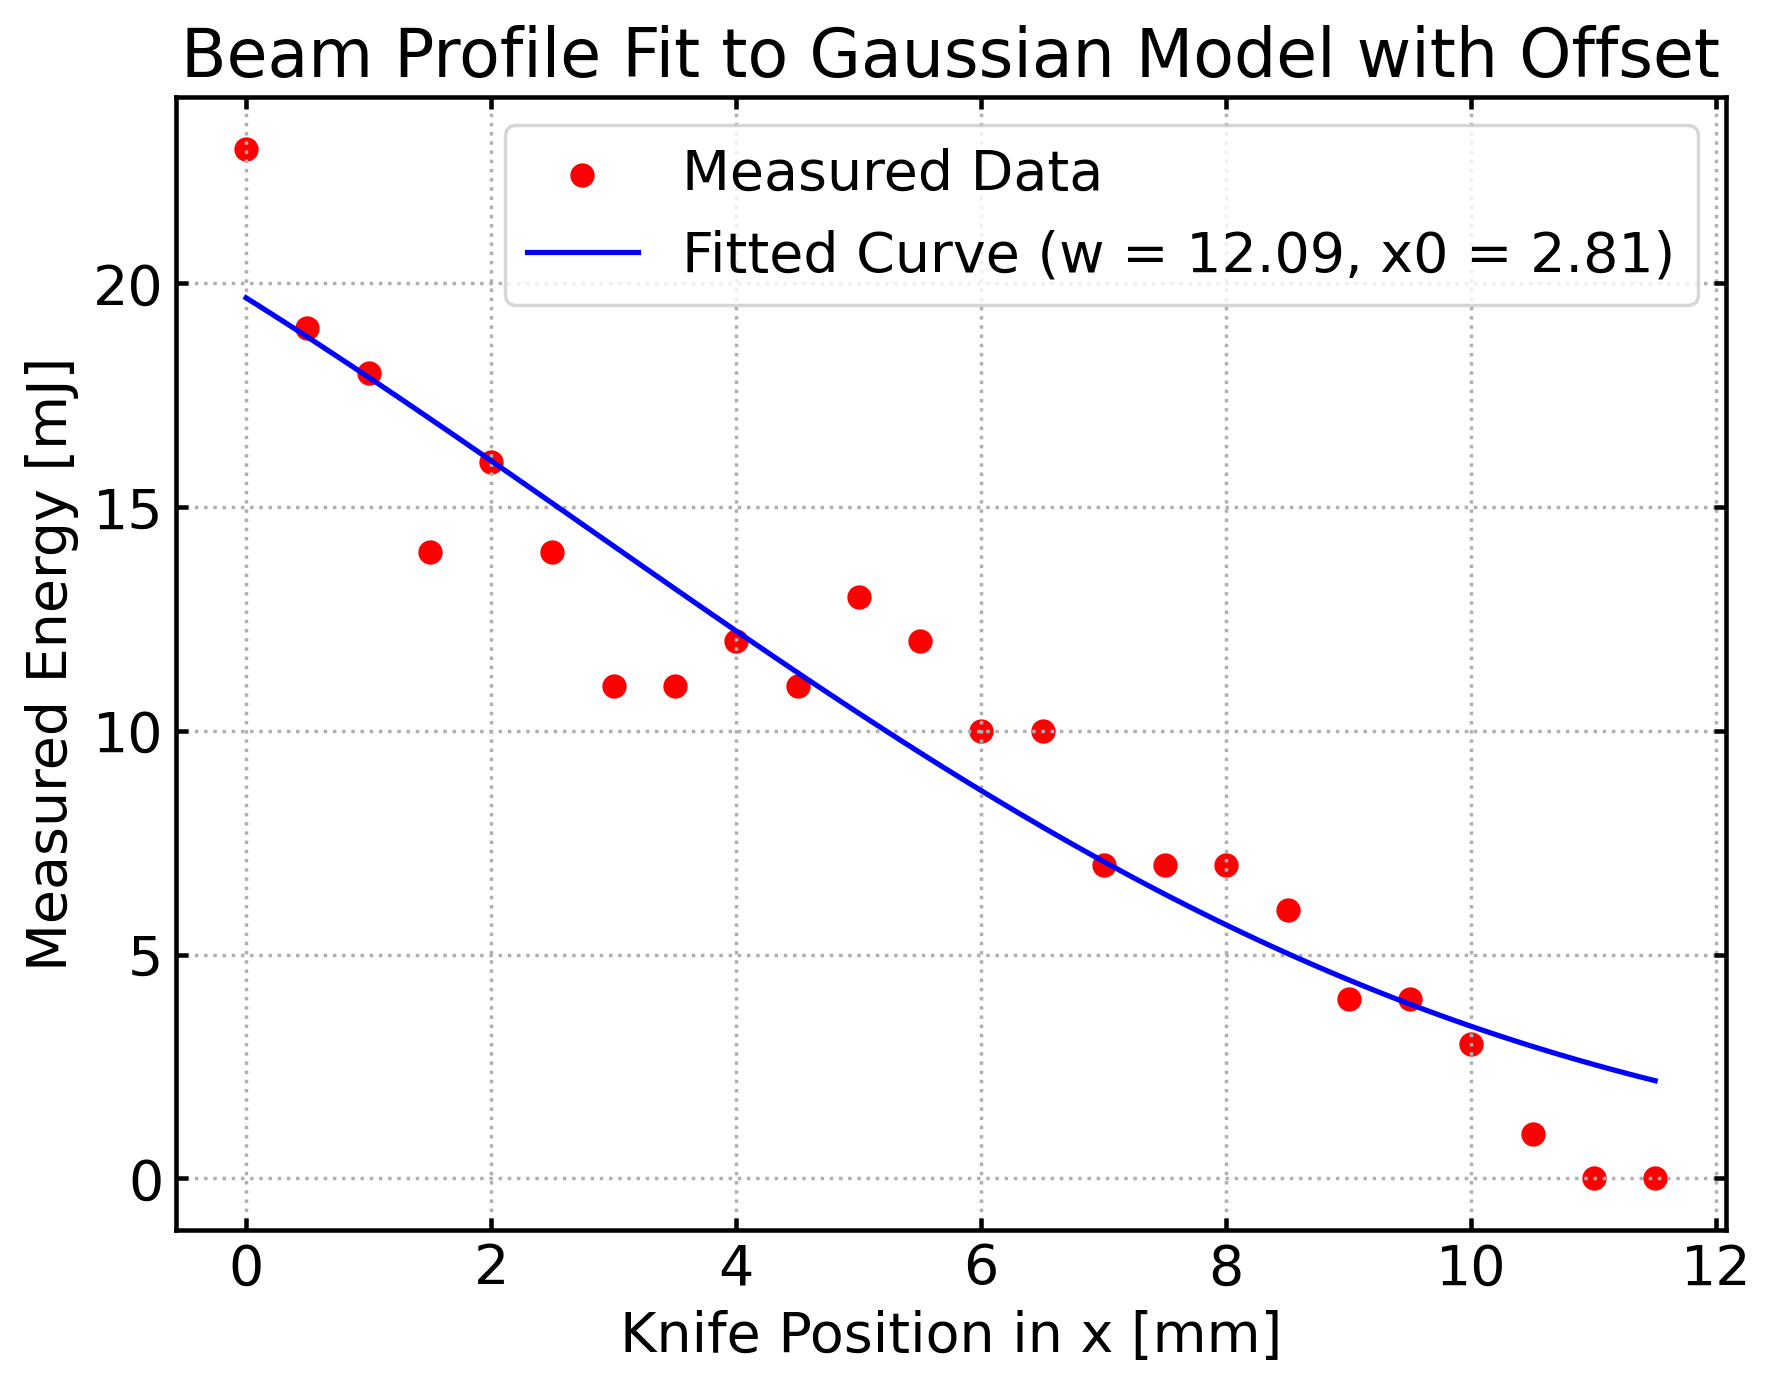

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Example data: Replace these with your actual data
energy = np.array([
    23, 19, 18, 14, 16, 14, 11, 11, 12, 11, 13, 12, 10, 10, 7, 7, 7, 6, 4, 4, 3, 1, 0, 0 
])
# Measured energy at each knife position
x = np.arange(0, len(energy) / 2, 0.5) 
# Knife positions (in mm or other units)

# Define the Gaussian beam energy function with an offset
def gaussian_energy_with_offset(x, E_total, w, x0):
    return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

# Initial guesses for total energy, beam waist, and offset
initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

# Perform the curve fitting
params, covariance = curve_fit(gaussian_energy_with_offset, x, energy, p0=initial_guesses)

# Extract the fit parameters
E_total_fit, w_fit, x0_fit = params

# Generate fitted curve for visualization
x_fit = np.linspace(min(x), max(x), 100)
energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

# Print the fitted parameters
print(f"Fitted total energy (E_total): {E_total_fit}")
print(f"Fitted beam waist (w): {w_fit}")
print(f"Fitted offset (x0): {x0_fit}")

# Plot the fitted curve vs. measured data
plt.figure(figsize=(8, 6))
plt.scatter(x, energy, label='Measured Data', color='red')
plt.plot(x_fit, energy_fit, label=f'Fitted Curve (w = {w_fit:.2f}, x0 = {x0_fit:.2f})', color='blue')
plt.xlabel('Knife Position in x [mm]')
plt.ylabel('Measured Energy [mJ]')
plt.title('Beam Profile Fit to Gaussian Model with Offset')
plt.legend()
plt.grid(True)
plt.show()


# the 3864

Fitted total energy (E_total): 19.525888331178272
Fitted beam waist (w): 4.315109974025674
Fitted offset (x0): 6.527011323207368


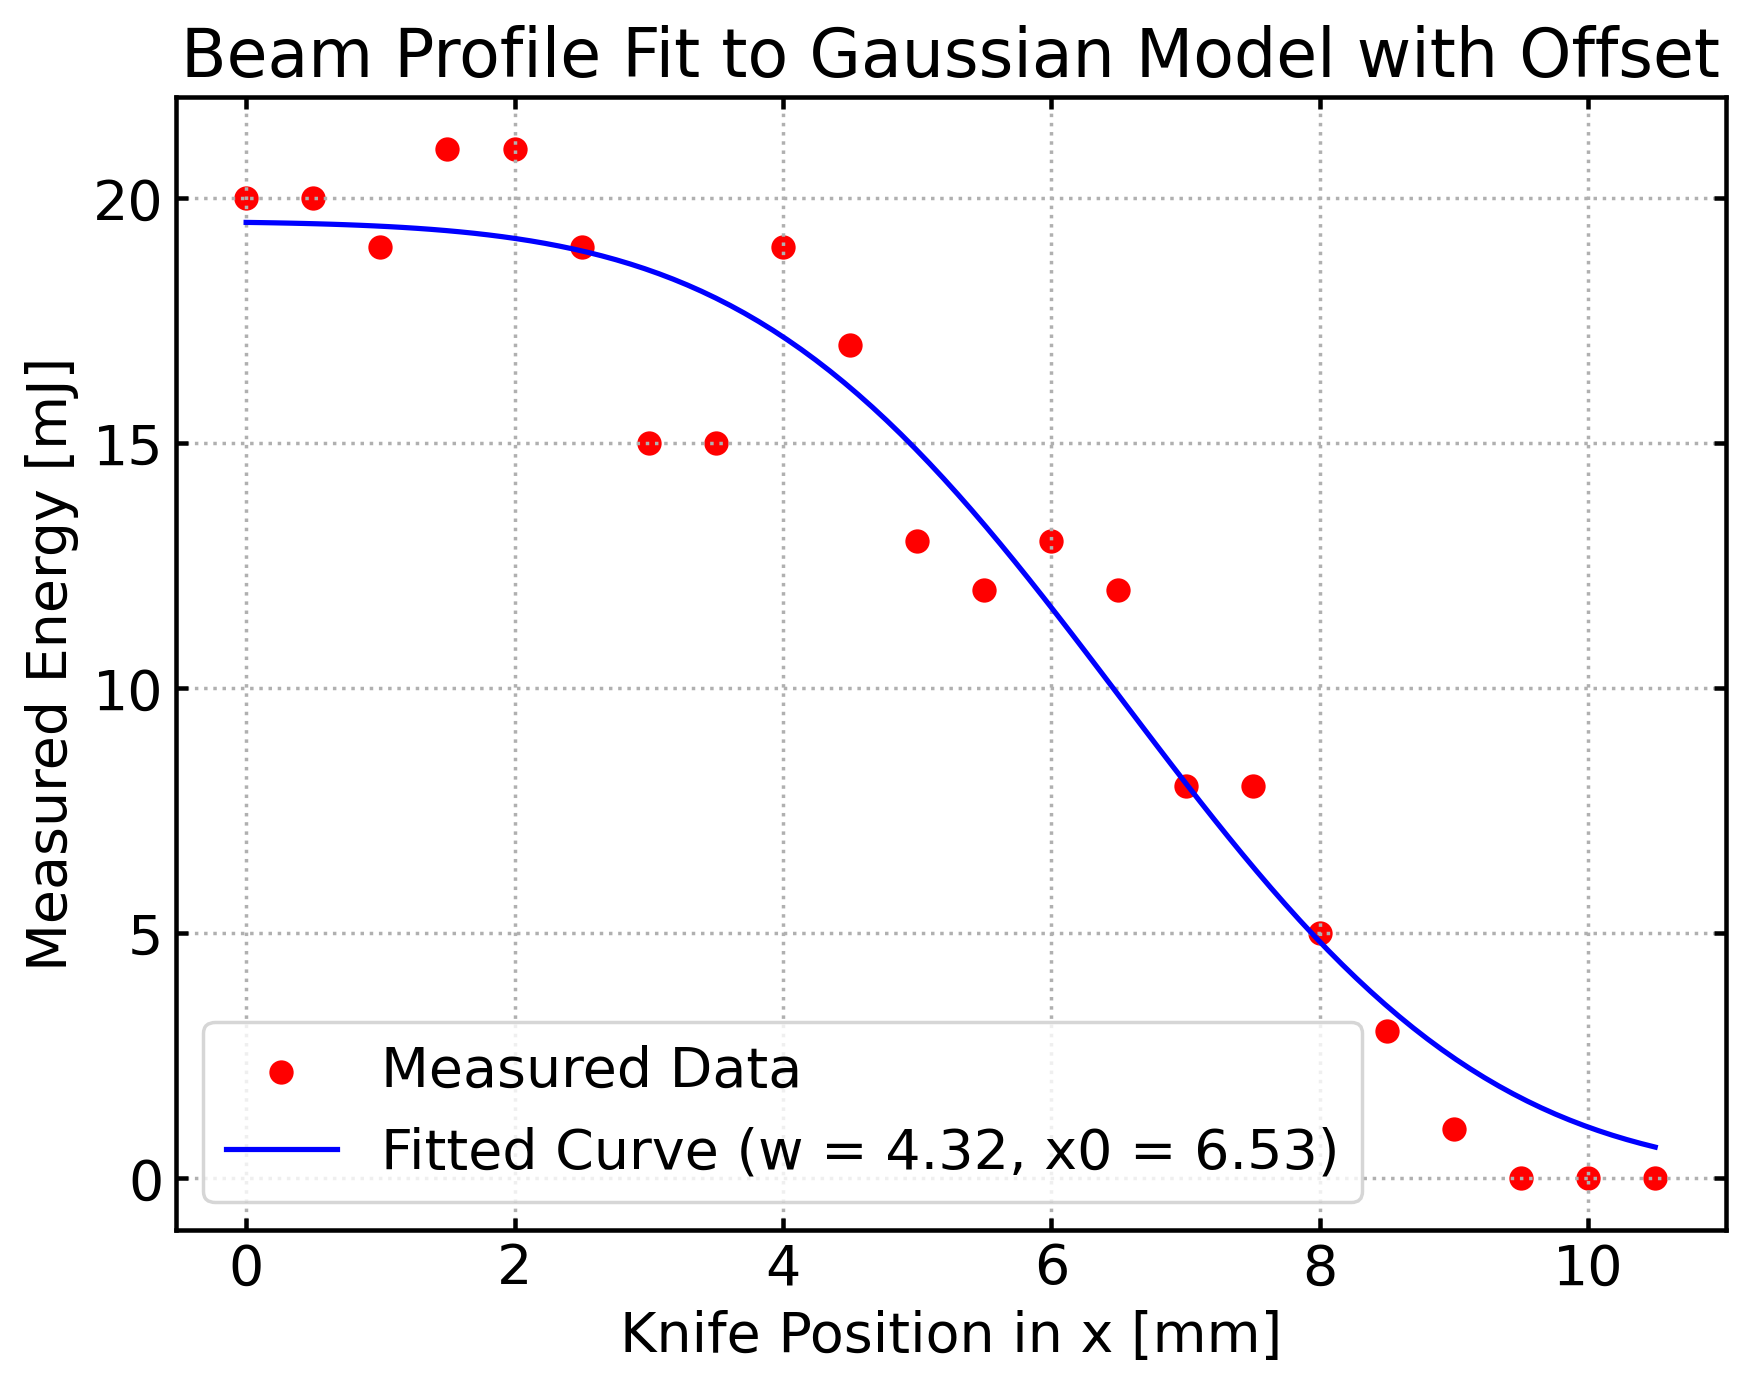

Fitted total energy (E_total): 17.956760505906107
Fitted beam waist (w): 5.840664900708637
Fitted offset (x0): 5.353568477517401


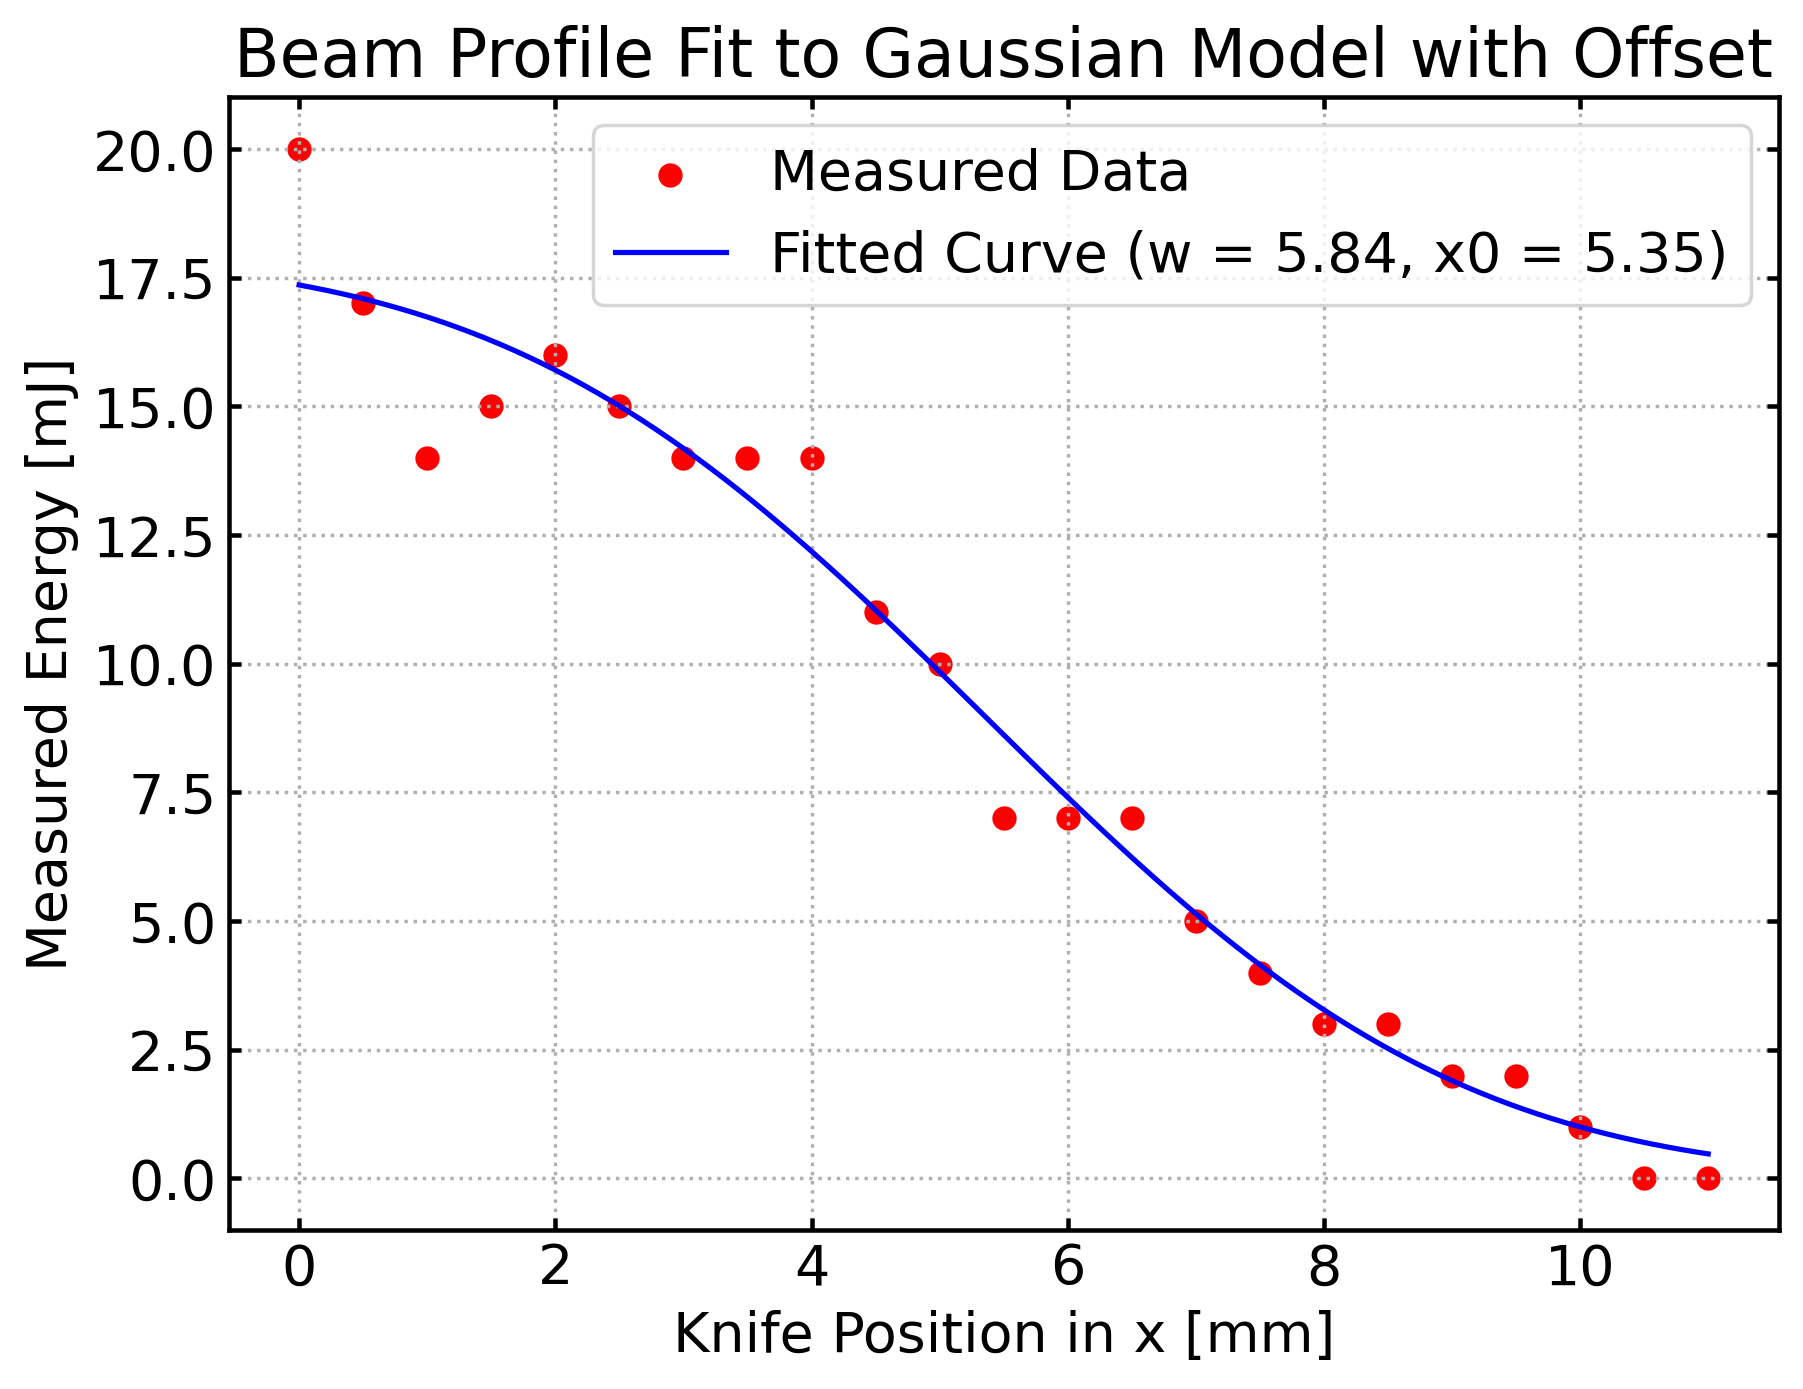

Fitted total energy (E_total): 11.855567527855676
Fitted beam waist (w): 8.391130315233065
Fitted offset (x0): 3.6849033537952947


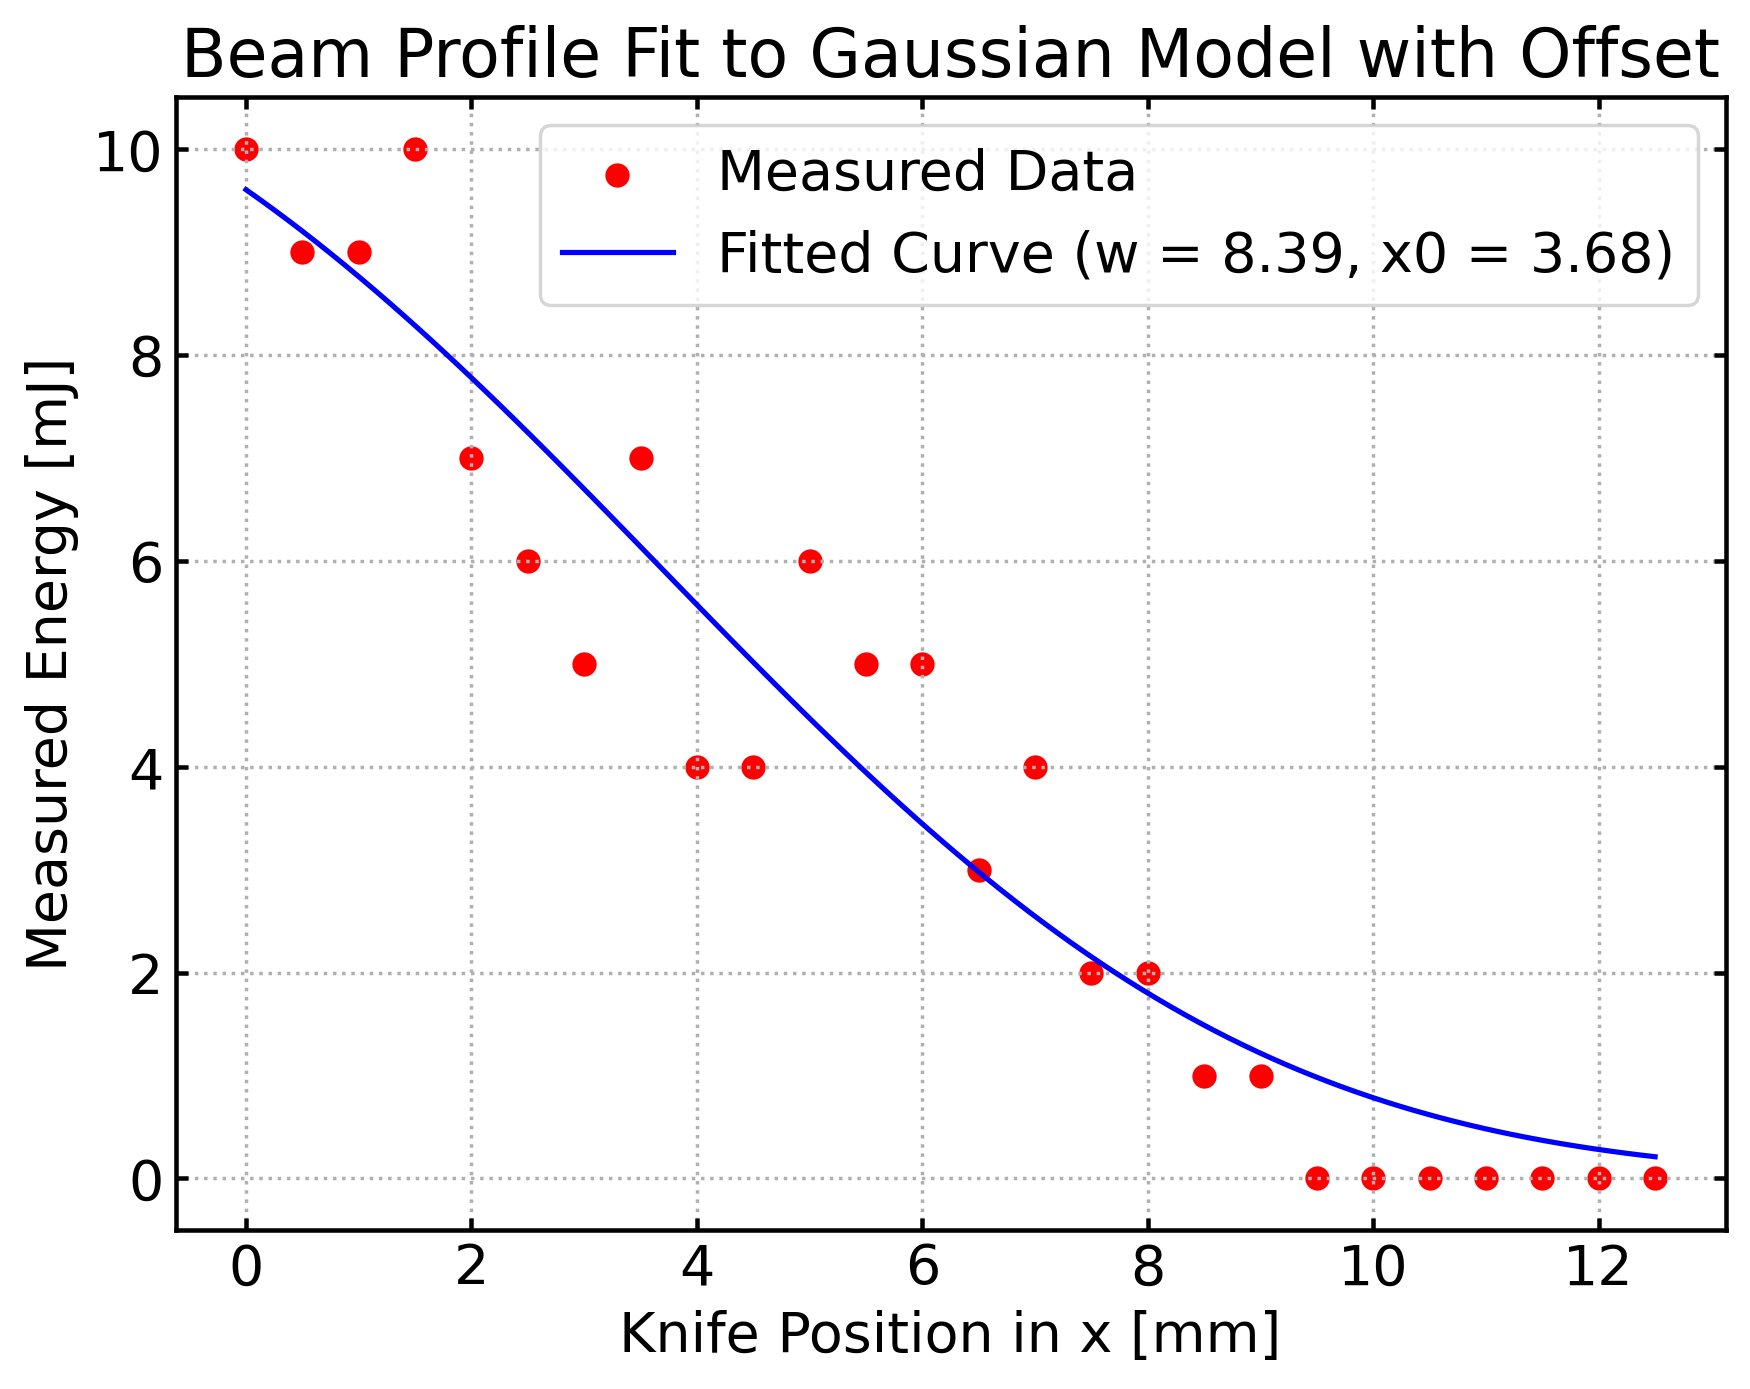

In [26]:

# Example data: Replace these with your actual data
#energy = np.array([
#    23, 19, 18, 14, 16, 14, 11, 11, 12, 11, 13, 12, 10, 10, 7, 7, 7, 6, 4, 4, 3, 1, 0, 0 
#])

for energy in energy_of_beam_lambda_3864_1_cm:
    # Measured energy at each knife position
    x = np.arange(0, len(energy) / 2, 0.5) 
    # Knife positions (in mm or other units)

    # Define the Gaussian beam energy function with an offset
    def gaussian_energy_with_offset(x, E_total, w, x0):
        return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

    # Initial guesses for total energy, beam waist, and offset
    initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

    # Perform the curve fitting
    params, covariance = curve_fit(gaussian_energy_with_offset, x, energy, p0=initial_guesses)

    # Extract the fit parameters
    E_total_fit, w_fit, x0_fit = params

    # Generate fitted curve for visualization
    x_fit = np.linspace(min(x), max(x), 100)
    energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

    # Print the fitted parameters
    print(f"Fitted total energy (E_total): {E_total_fit}")
    print(f"Fitted beam waist (w): {w_fit}")
    print(f"Fitted offset (x0): {x0_fit}")

    # Plot the fitted curve vs. measured data
    plt.figure(figsize=(8, 6))
    plt.scatter(x, energy, label='Measured Data', color='red')
    plt.plot(x_fit, energy_fit, label=f'Fitted Curve (w = {w_fit:.2f}, x0 = {x0_fit:.2f})', color='blue')
    plt.xlabel('Knife Position in x [mm]')
    plt.ylabel('Measured Energy [mJ]')
    plt.title('Beam Profile Fit to Gaussian Model with Offset')
    plt.legend()
    plt.grid(True)
    plt.show()


Fitted total energy (E_total): 98.33204742091714 ± 4.414581164553223
Fitted beam waist (w): 2.950953969322617 ± 0.17676810241536825
Fitted offset (x0): 3.096330857647436 ± 0.11724336594368268


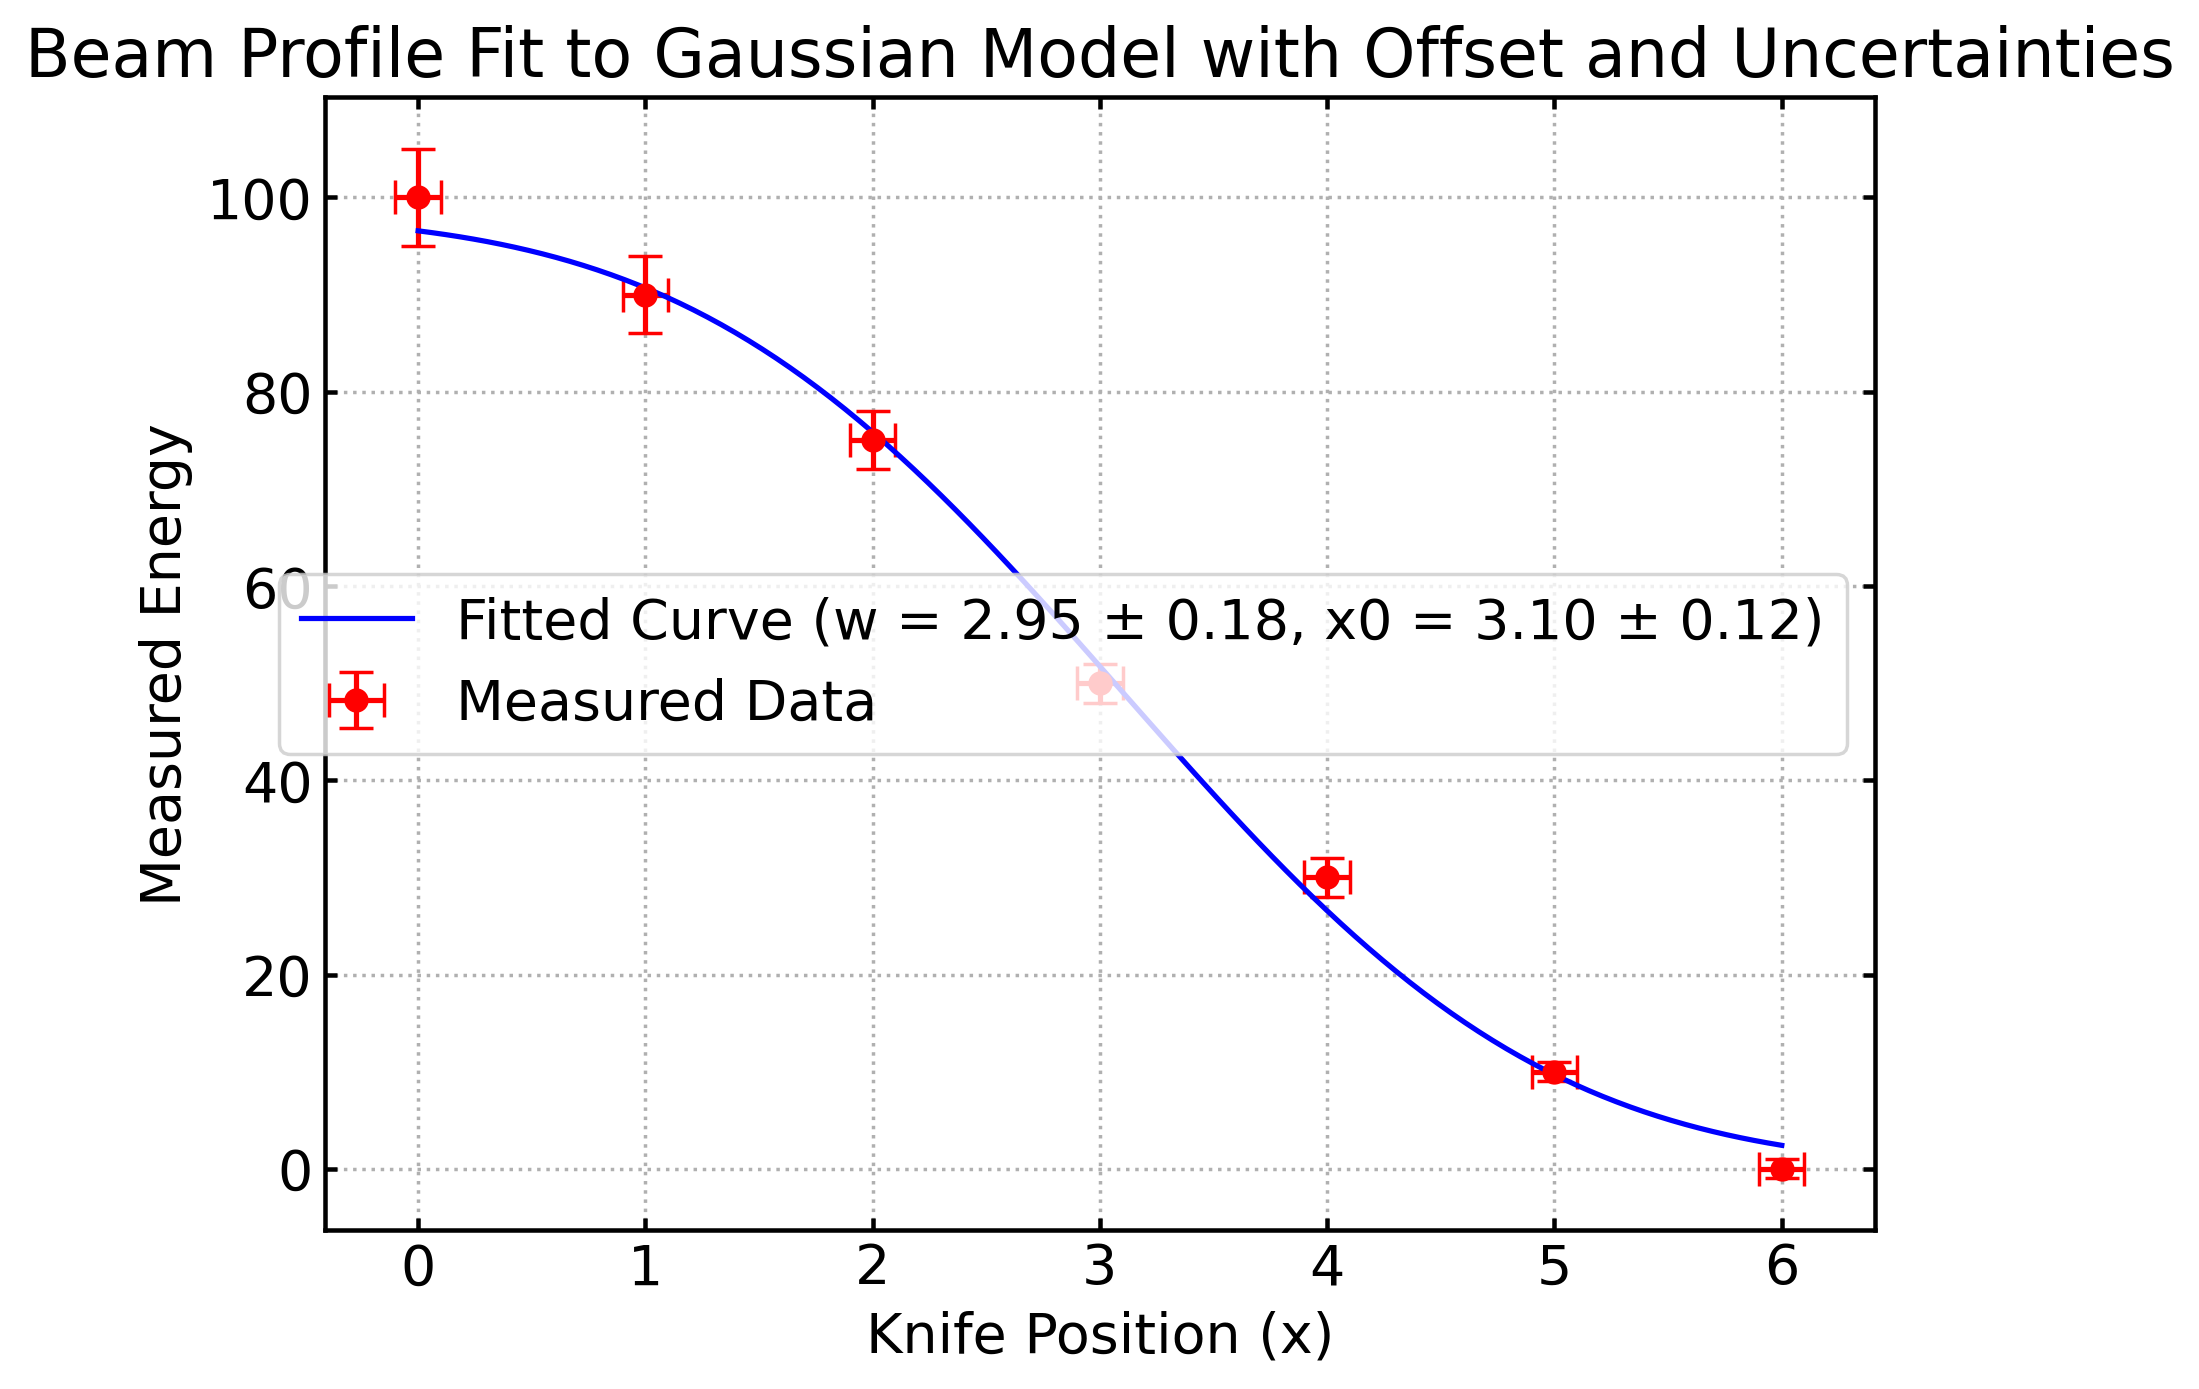

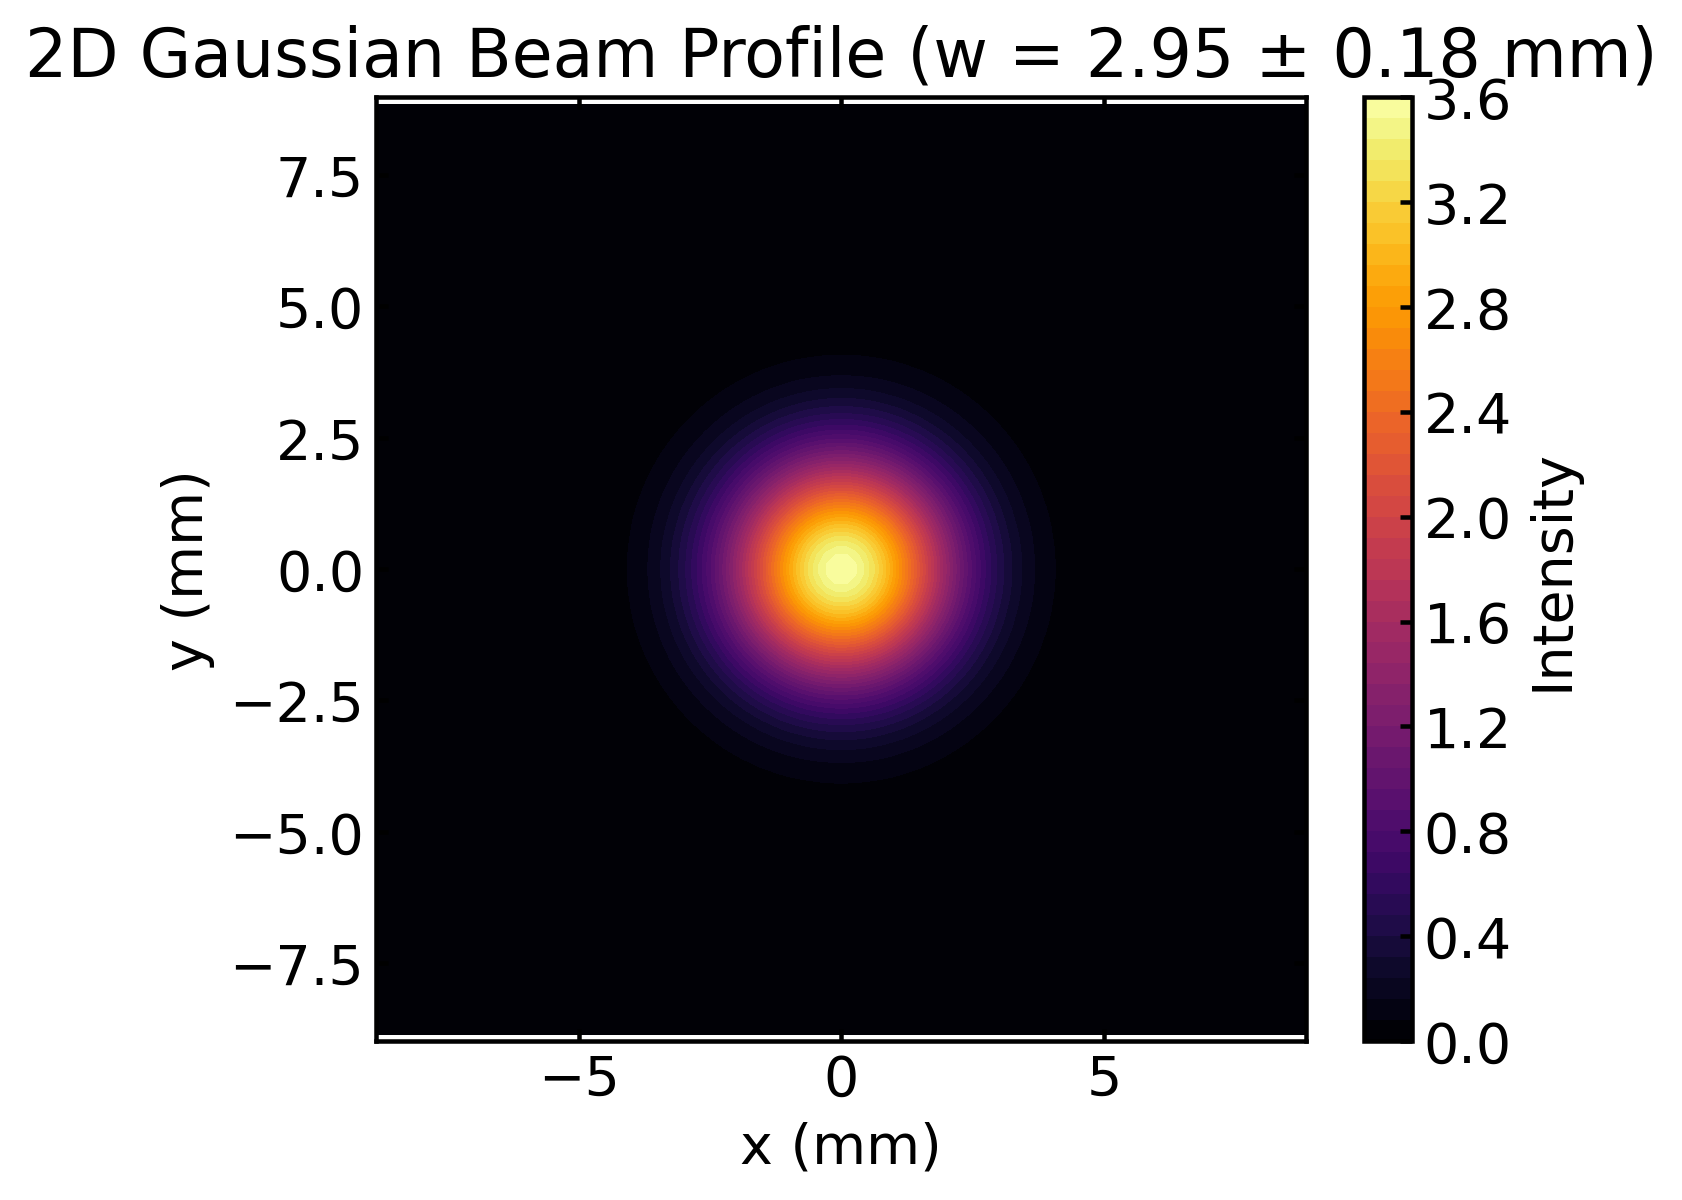

In [27]:

# Example data: Replace these with your actual data
x = np.array([0, 1, 2, 3, 4, 5, 6])  # Knife positions (in mm or other units)
energy = np.array([100, 90, 75, 50, 30, 10, 0])  # Measured energy at each knife position

# Example uncertainties (replace these with your actual uncertainties)
x_uncertainty = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Knife position uncertainties (mm)
energy_uncertainty = np.array([5, 4, 3, 2, 2, 1, 1])  # Energy uncertainties

# Define the Gaussian beam energy function with an offset
def gaussian_energy_with_offset(x, E_total, w, x0):
    return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

# Initial guesses for total energy, beam waist, and offset
initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

# Perform the curve fitting, using the energy uncertainty in the fit
params, covariance = curve_fit(
    gaussian_energy_with_offset, x, energy, p0=initial_guesses, sigma=energy_uncertainty, absolute_sigma=True
)

# Extract the fit parameters and their uncertainties
E_total_fit, w_fit, x0_fit = params
perr = np.sqrt(np.diag(covariance))  # Parameter uncertainties (sqrt of diagonal covariance)
E_total_err, w_err, x0_err = perr

# Generate fitted curve for visualization
x_fit = np.linspace(min(x), max(x), 100)
energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

# Print the fitted parameters with uncertainties
print(f"Fitted total energy (E_total): {E_total_fit} ± {E_total_err}")
print(f"Fitted beam waist (w): {w_fit} ± {w_err}")
print(f"Fitted offset (x0): {x0_fit} ± {x0_err}")

# Plot the fitted curve vs. measured data with uncertainties
plt.figure(figsize=(8, 6))
plt.errorbar(x, energy, yerr=energy_uncertainty, xerr=x_uncertainty, fmt='o', 
             label='Measured Data', color='red', capsize=5)
plt.plot(x_fit, energy_fit, 
         label=f'Fitted Curve (w = {w_fit:.2f} ± {w_err:.2f}, x0 = {x0_fit:.2f} ± {x0_err:.2f})', color='blue')
plt.xlabel('Knife Position (x)')
plt.ylabel('Measured Energy')
plt.title('Beam Profile Fit to Gaussian Model with Offset and Uncertainties')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# Now plot the 2D Gaussian beam profile
# --------------------------------------------

# Define the 2D Gaussian intensity profile function
def gaussian_2d(x, y, I0, w):
    return I0 * np.exp(-2 * (x**2 + y**2) / w**2)

# Generate a 2D grid for plotting
grid_size = 100  # You can adjust this for finer resolution
grid_range = 3 * w_fit  # Define the range in terms of beam waist
x_vals = np.linspace(-grid_range, grid_range, grid_size)
y_vals = np.linspace(-grid_range, grid_range, grid_size)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the intensity at each (x, y) point
I0_fit = E_total_fit / (np.pi * w_fit**2)  # Estimate peak intensity based on energy and waist
intensity_2d = gaussian_2d(X, Y, I0_fit, w_fit)

# Plot the 2D beam profile as a heatmap
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, intensity_2d, levels=50, cmap='inferno')
plt.colorbar(label='Intensity')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title(f'2D Gaussian Beam Profile (w = {w_fit:.2f} ± {w_err:.2f} mm)')
plt.axis('equal')
plt.grid(False)
plt.show()


# with unc

Fitted total energy (E_total): 18.55845152920671 ± 0.9065124410124442
Fitted beam waist (w): 3.0884835629525984 ± 0.4379139781455701
Fitted offset (x0): 6.673875554006328 ± 0.2440492932556868


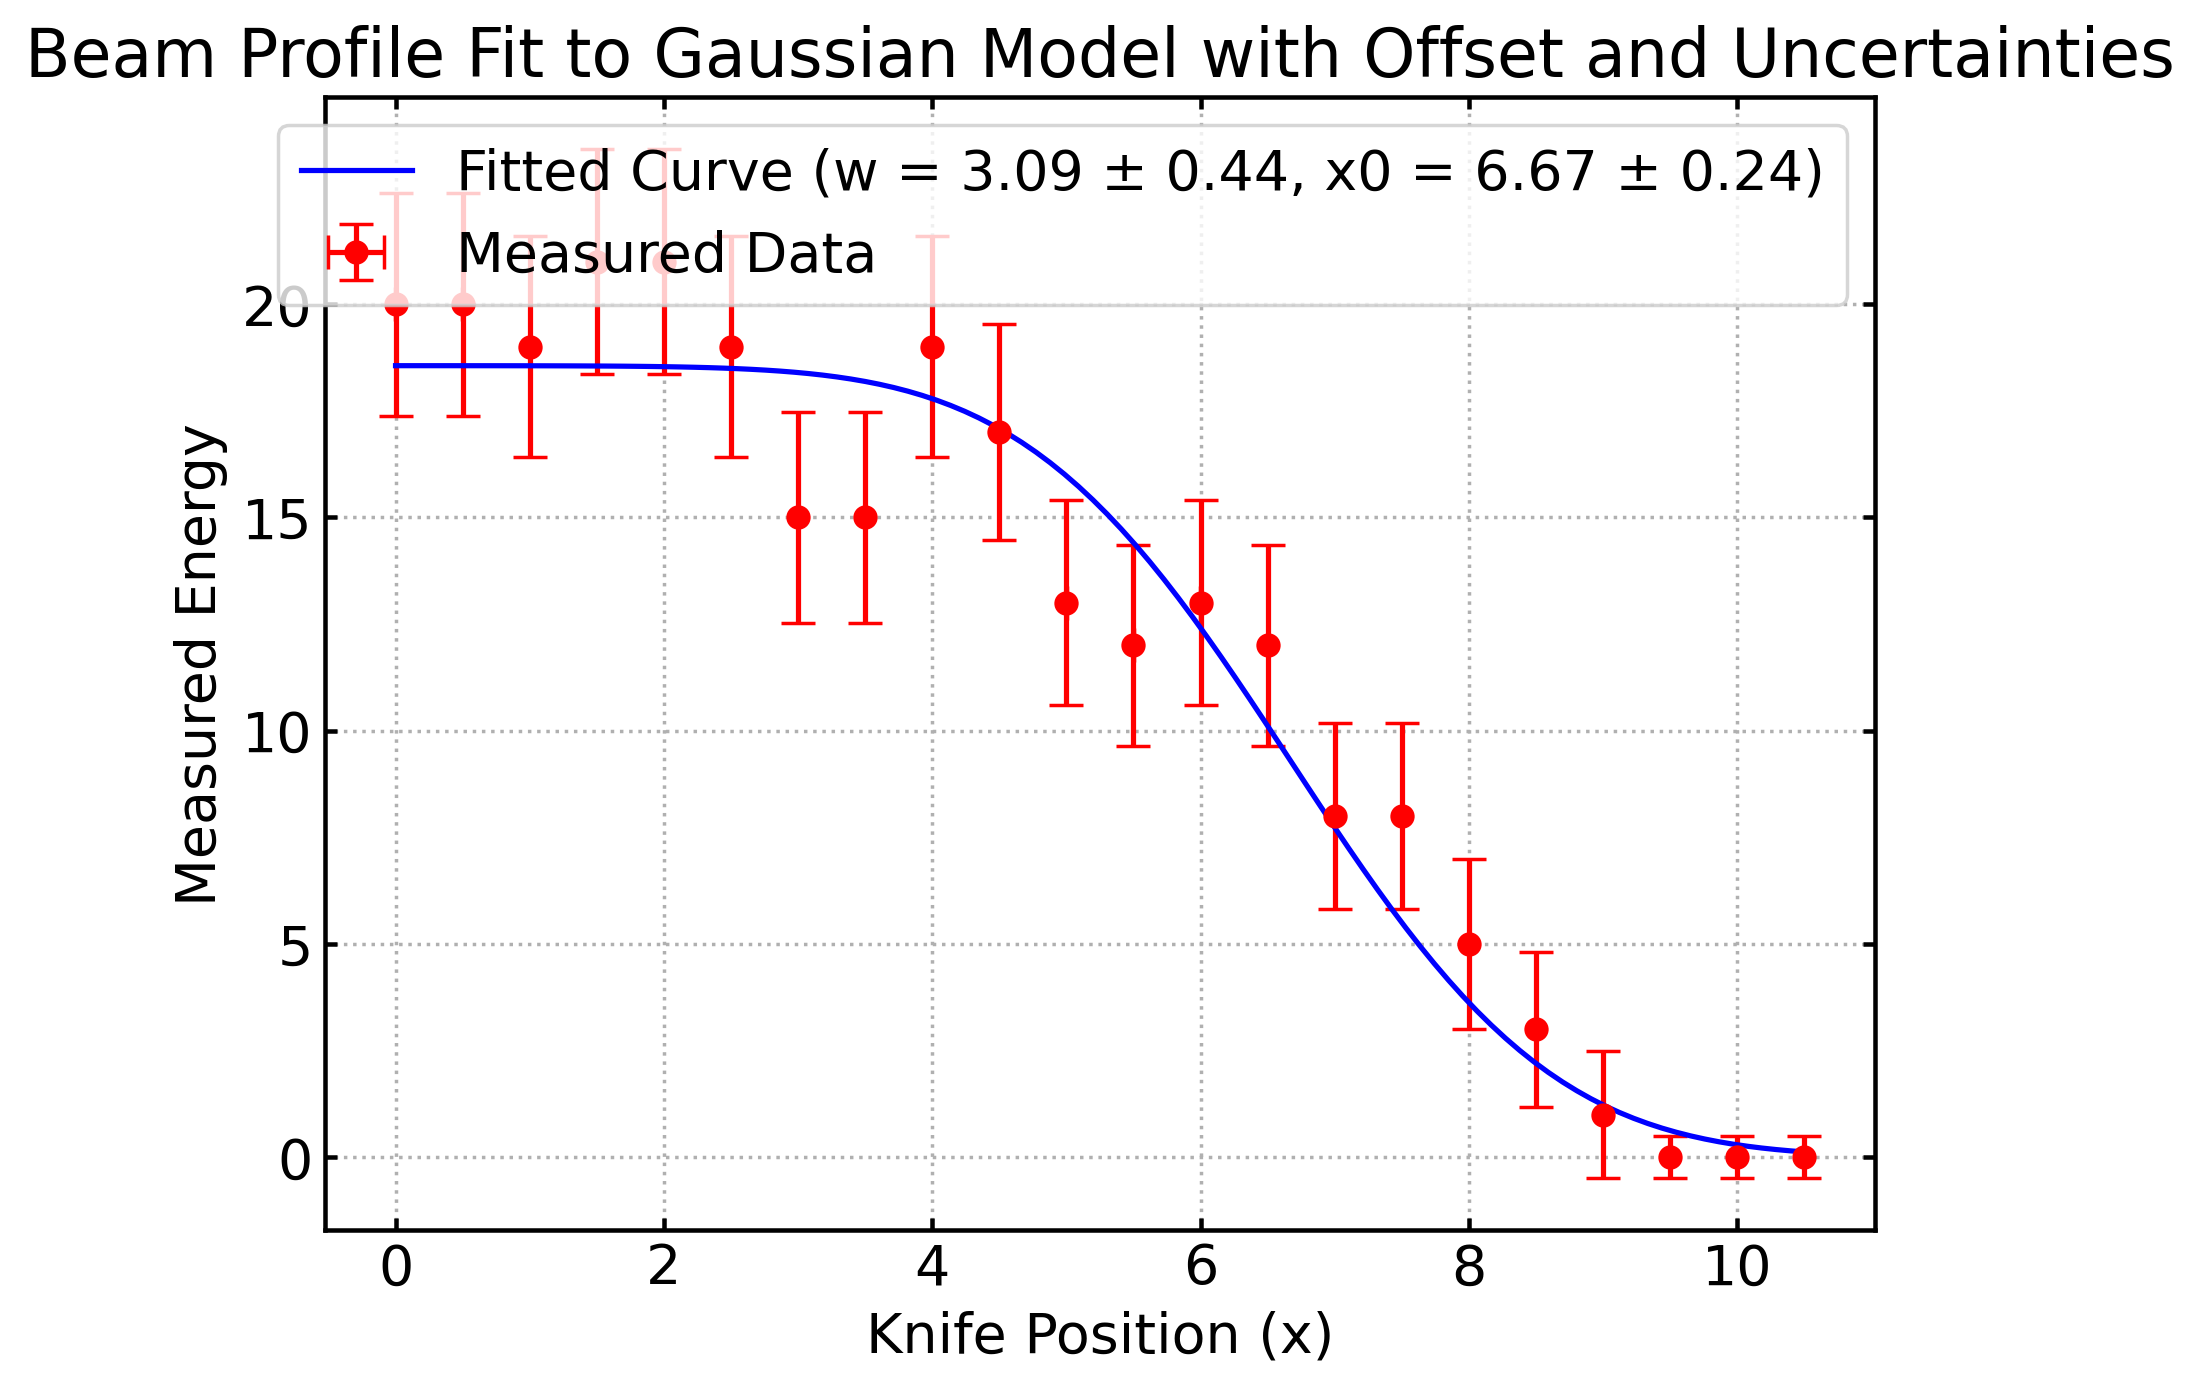

Fitted total energy (E_total): 17.076748720253494 ± 1.5448863403346738
Fitted beam waist (w): 5.0211655864459654 ± 0.8664055215969877
Fitted offset (x0): 5.54889251827608 ± 0.488105668120799


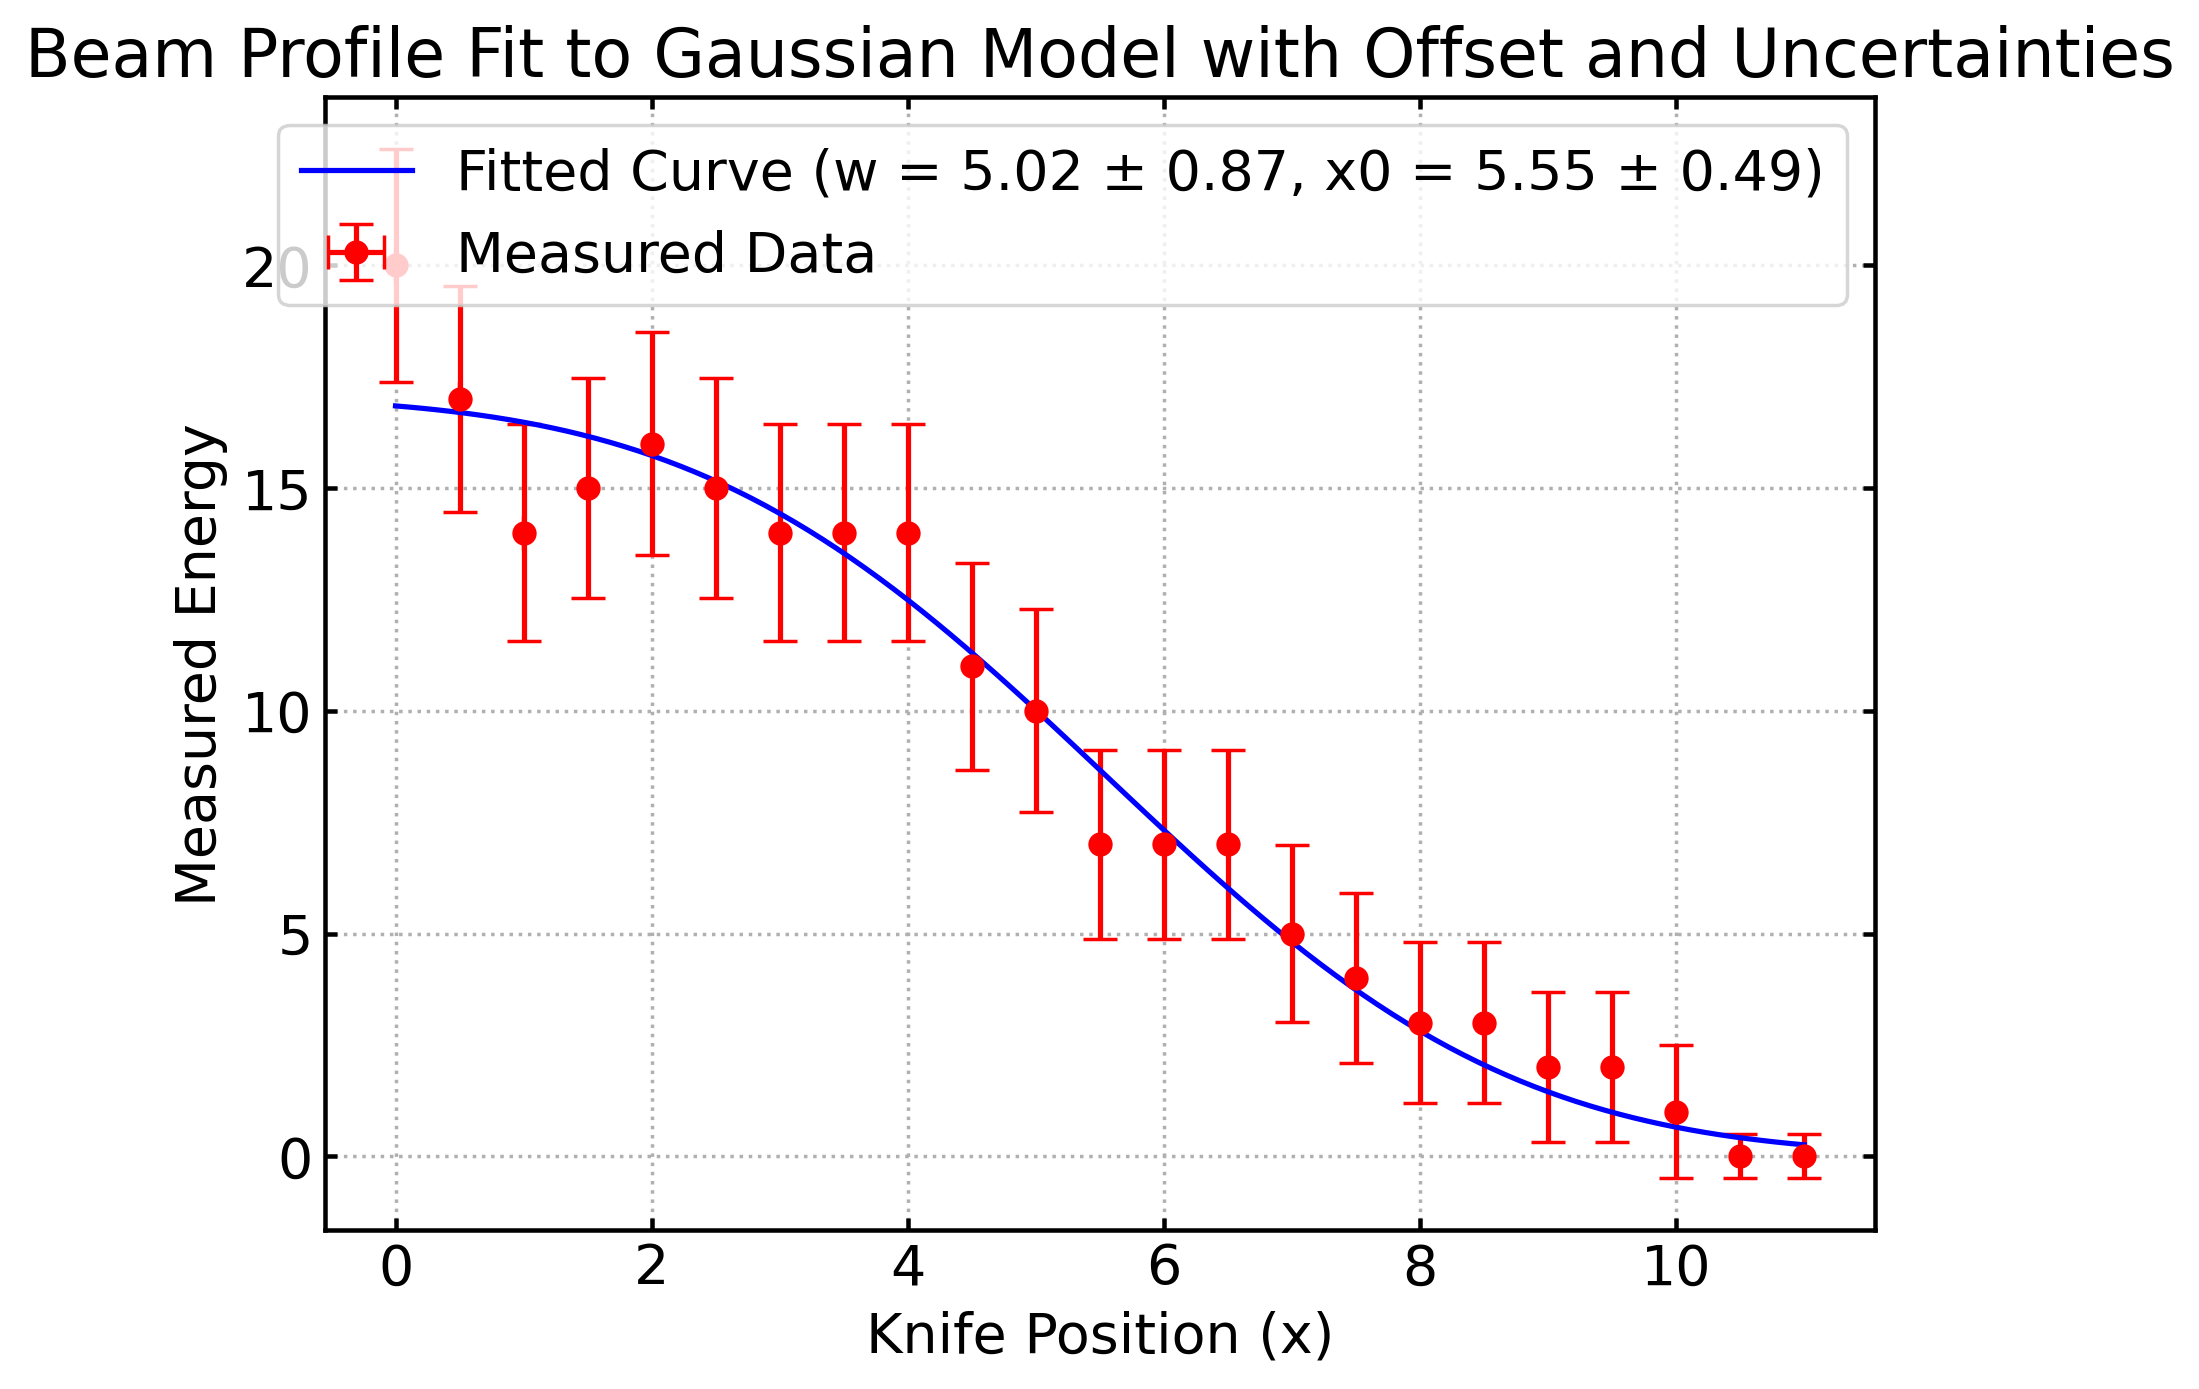

Fitted total energy (E_total): 9.15459945090833 ± 1.7645678835457979
Fitted beam waist (w): 5.419445403791888 ± 1.4592059286592316
Fitted offset (x0): 4.9369375924382535 ± 1.0293271894559777


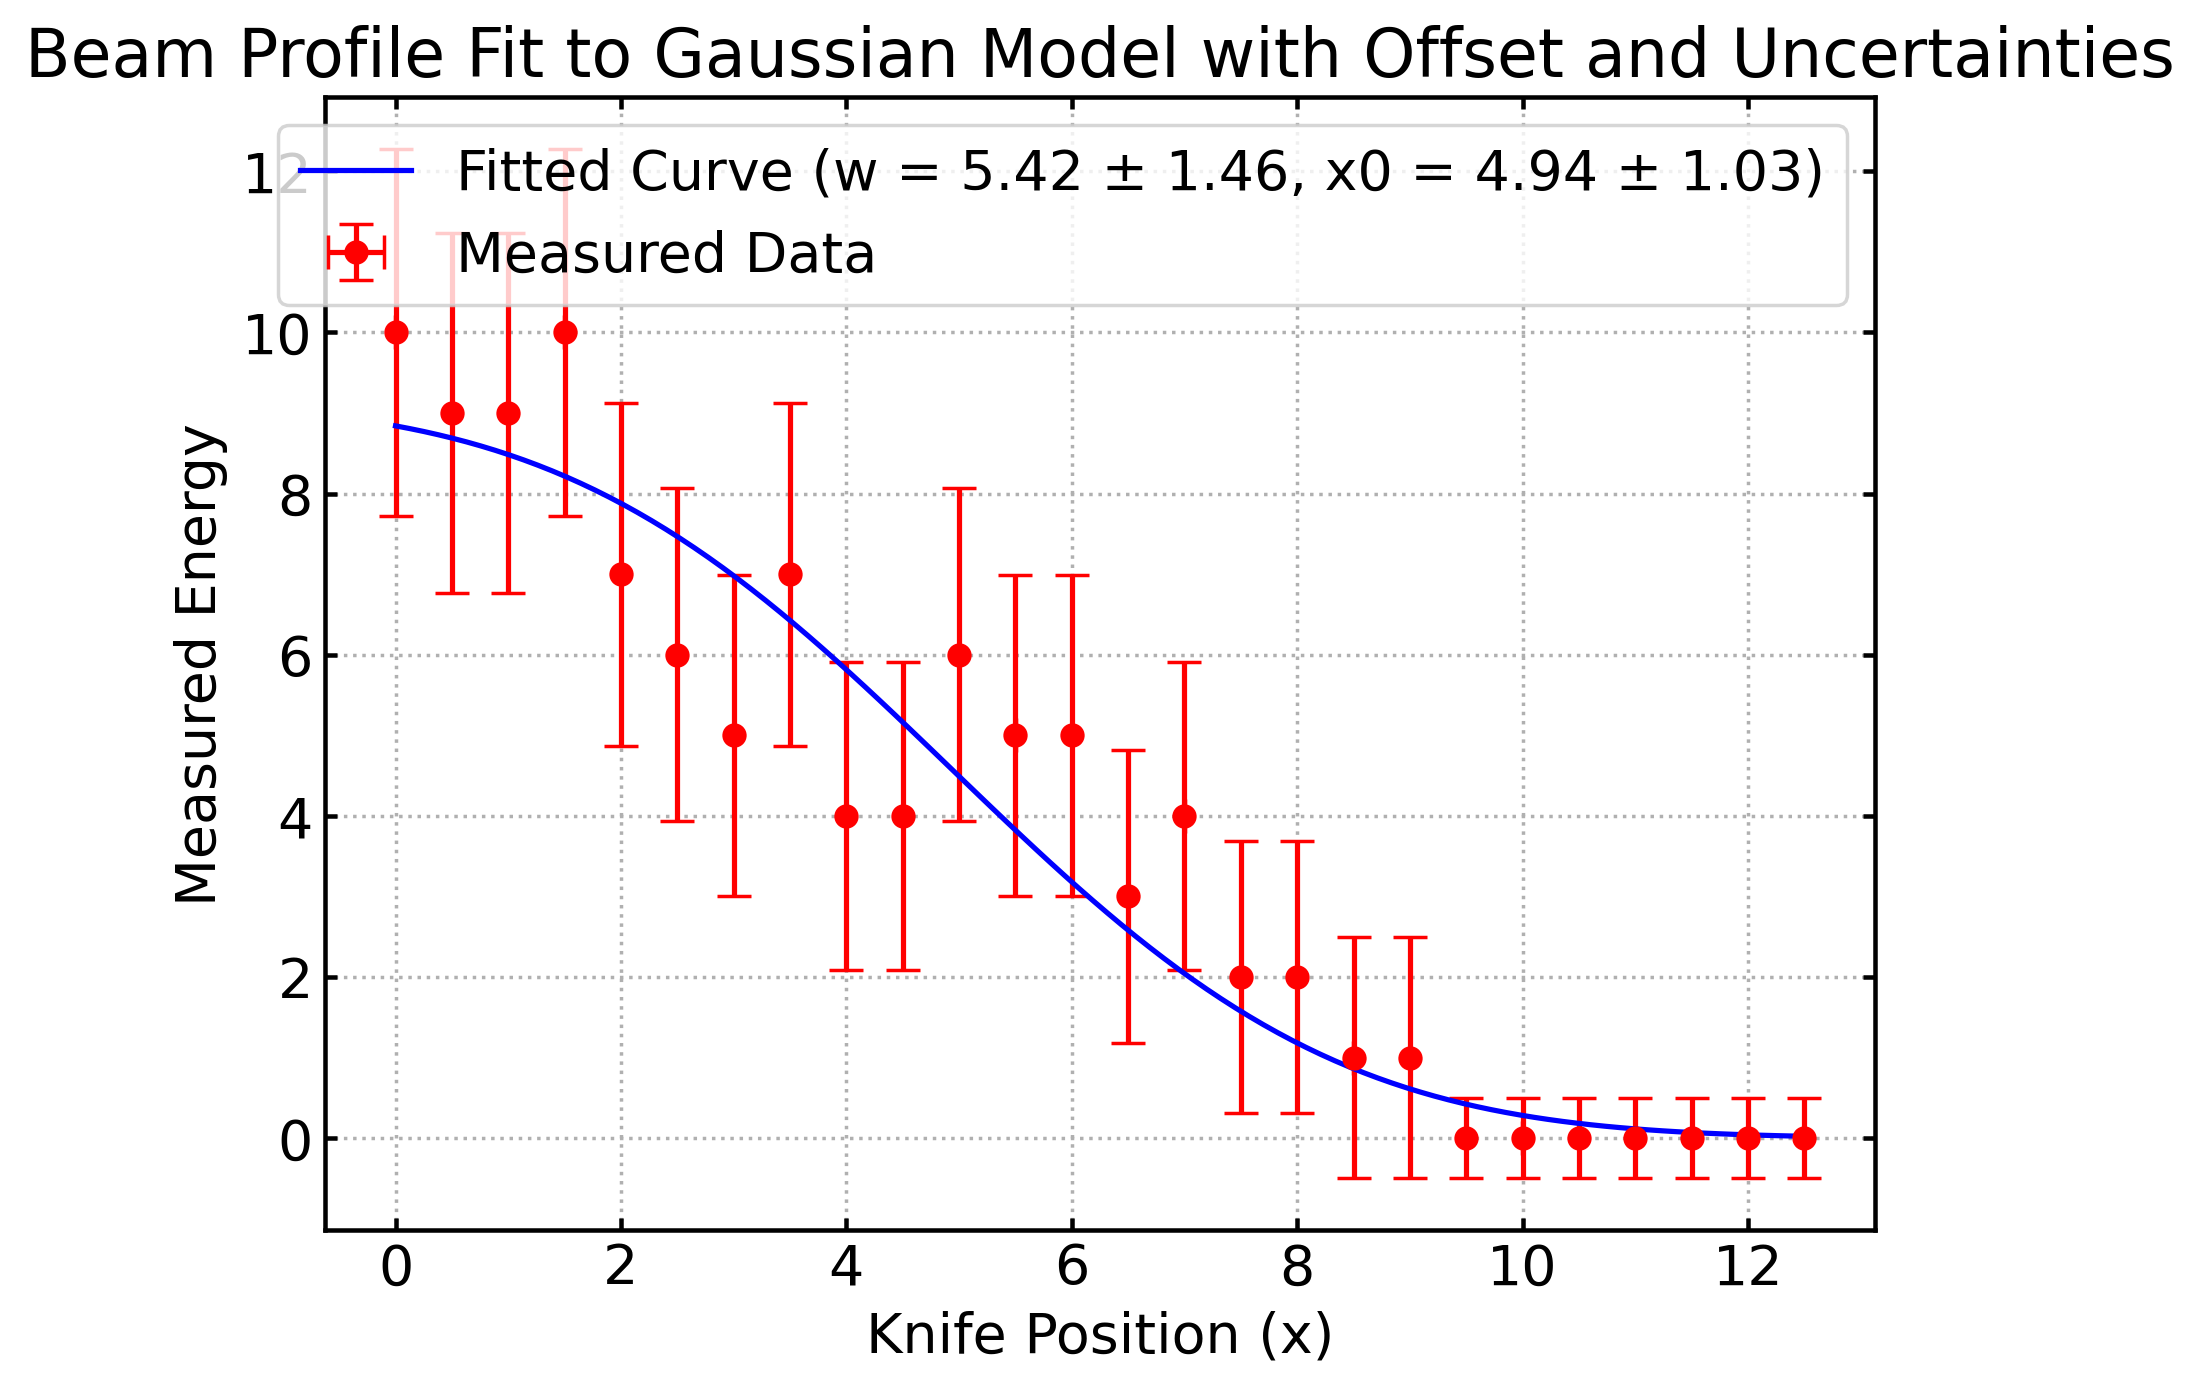

In [47]:

# Example data: Replace these with your actual data
for energys in energy_of_beam_lambda_3864_1_cm:
    # Measured energy at each knife position
    x = np.arange(0, len(energys) / 2, 0.5) 
    # Knife positions (in mm or other units)
    energy = np.array(energys)
    
    # Example uncertainties (replace these with your actual uncertainties)
    x_uncertainty = np.zeros(len(x)) + 0.001  # Knife position uncertainties (mm)
    energy_uncertainty = energy**(1/4) + 0.5 # Energy uncertainties

    # Define the Gaussian beam energy function with an offset
    def gaussian_energy_with_offset(x, E_total, w, x0):
        return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

    # Initial guesses for total energy, beam waist, and offset
    initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

    # Perform the curve fitting, using the energy uncertainty in the fit
    params, covariance = curve_fit(
        gaussian_energy_with_offset, x, energy, p0=initial_guesses,
        sigma=energy_uncertainty, absolute_sigma=True
    )

    # Extract the fit parameters and their uncertainties
    E_total_fit, w_fit, x0_fit = params
    perr = np.sqrt(np.diag(covariance))  # Parameter uncertainties (sqrt of diagonal covariance)
    E_total_err, w_err, x0_err = perr

    # Generate fitted curve for visualization
    x_fit = np.linspace(min(x), max(x), 100)
    energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

    # Print the fitted parameters with uncertainties
    print(f"Fitted total energy (E_total): {E_total_fit} ± {E_total_err}")
    print(f"Fitted beam waist (w): {w_fit} ± {w_err}")
    print(f"Fitted offset (x0): {x0_fit} ± {x0_err}")

    # Plot the fitted curve vs. measured data with uncertainties
    plt.figure(figsize=(8, 6))
    plt.errorbar(x, energy, yerr=energy_uncertainty, xerr=x_uncertainty, fmt='o', 
                 label='Measured Data', color='red', capsize=5)
    plt.plot(x_fit, energy_fit, 
             label=f'Fitted Curve (w = {w_fit:.2f} ± {w_err:.2f}, x0 = {x0_fit:.2f} ± {x0_err:.2f})',
             color='blue')
    plt.xlabel('Knife Position (x)')
    plt.ylabel('Measured Energy')
    plt.title('Beam Profile Fit to Gaussian Model with Offset and Uncertainties')
    plt.legend()
    plt.grid(True)
    plt.show()

Fitted total energy (E_total): 32.064107730318625 ± 1.178744680882765
Fitted beam waist (w): 3.479238176175666 ± 0.33362386924746806
Fitted offset (x0): 5.965709787517448 ± 0.17946137811911633


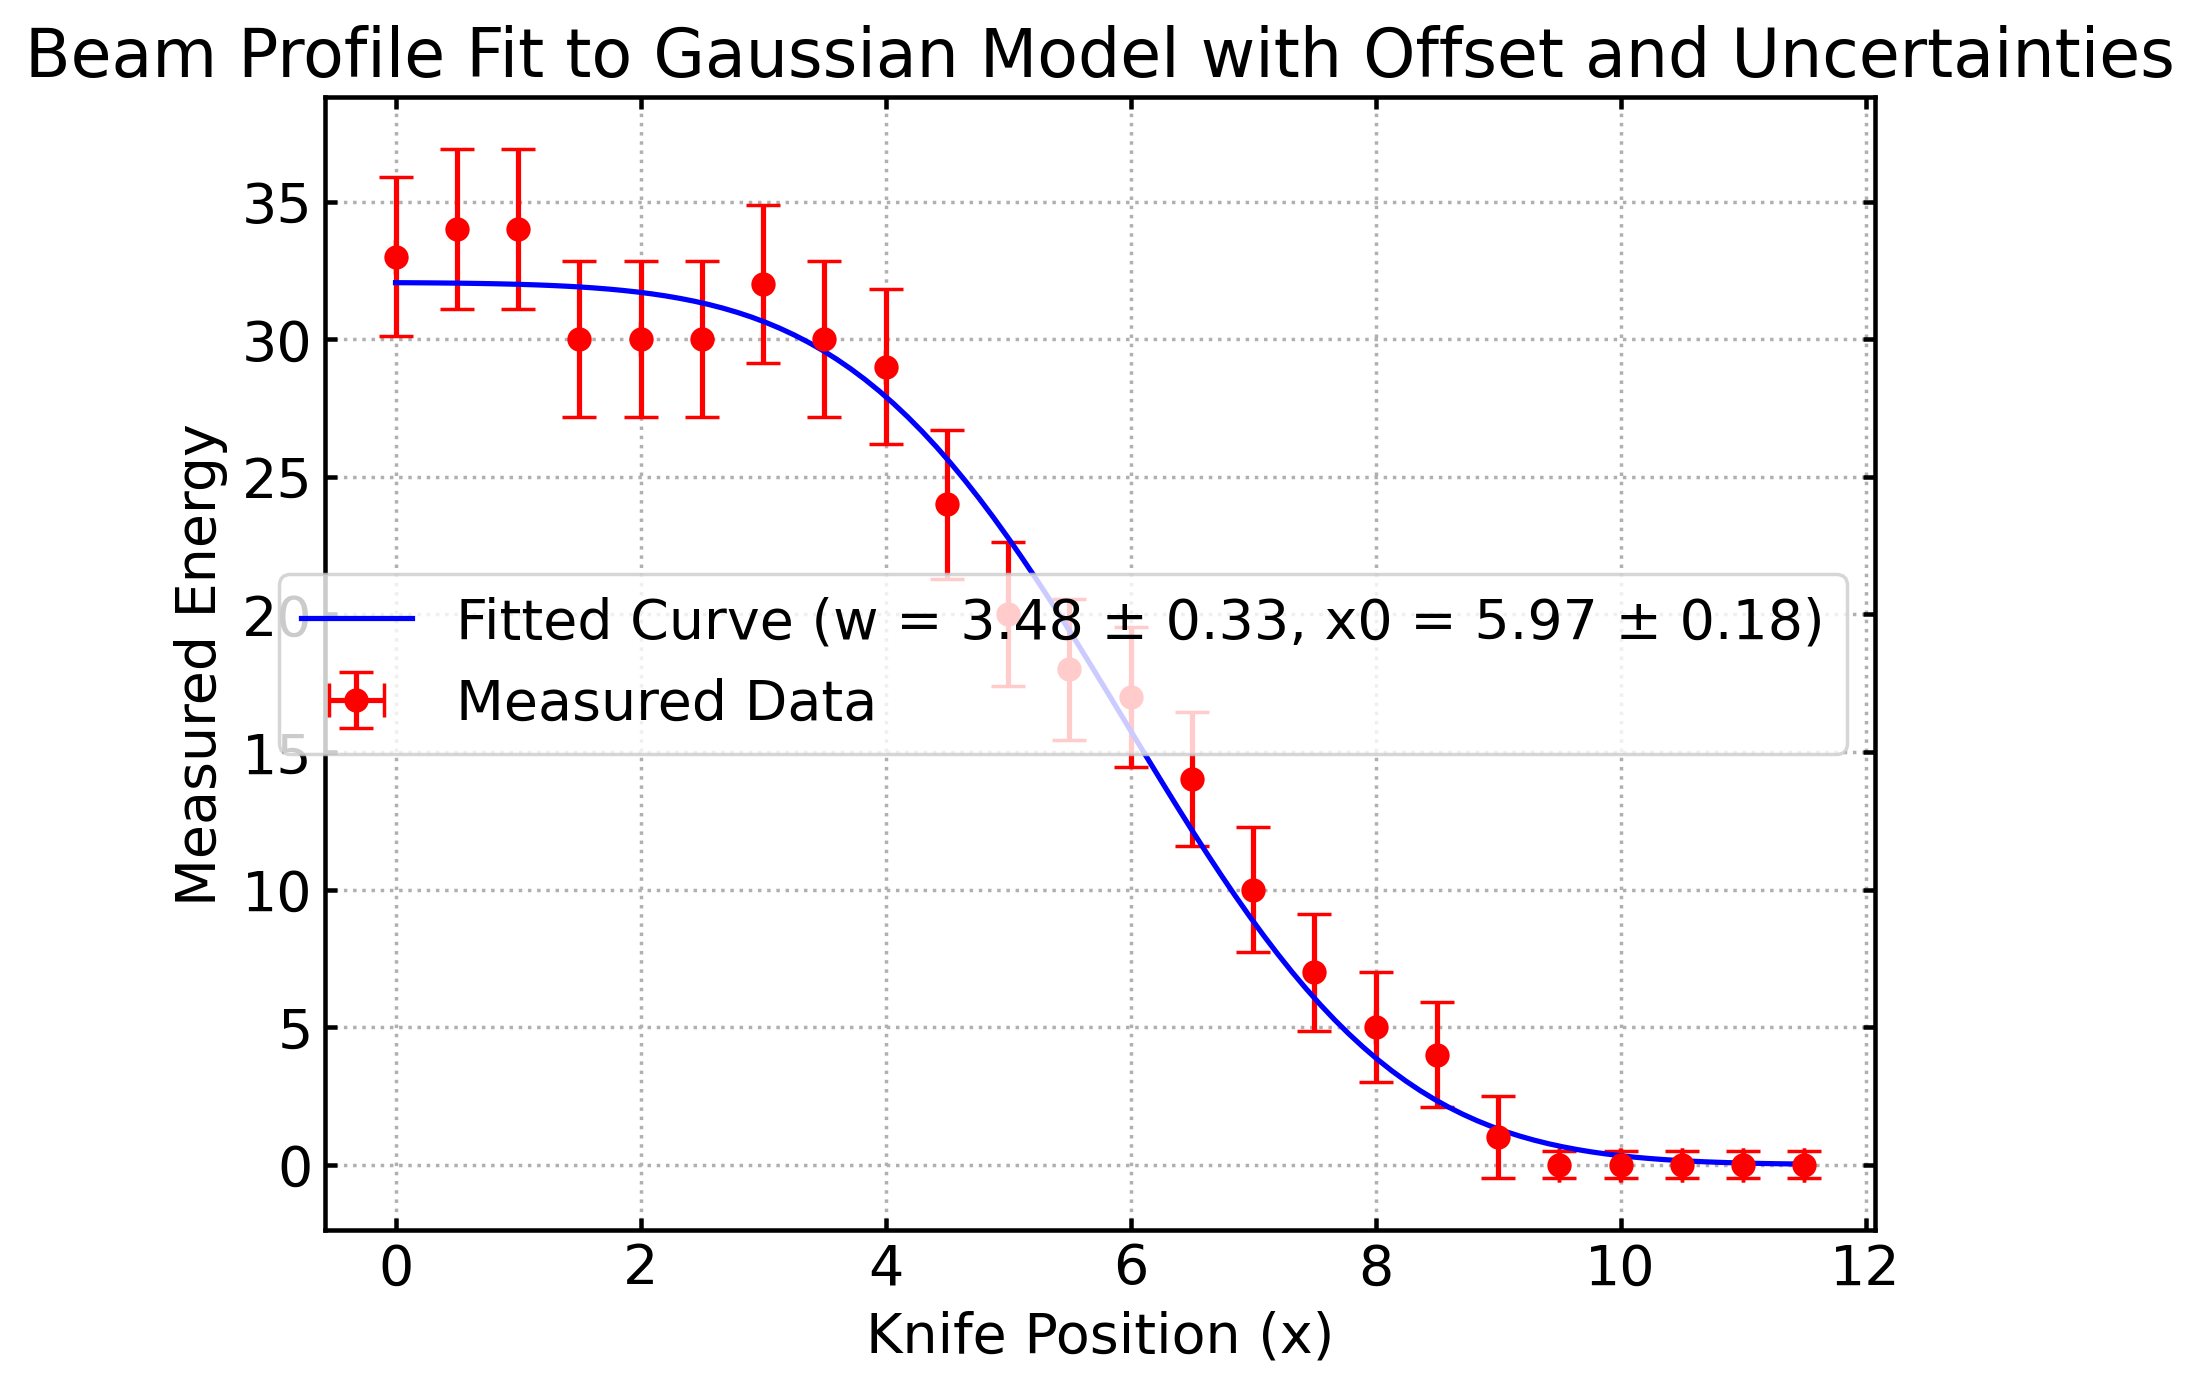

Fitted total energy (E_total): 30.471561406913146 ± 2.490160356483447
Fitted beam waist (w): 5.747381306452689 ± 0.6470421654085372
Fitted offset (x0): 4.82121352315843 ± 0.4379167819528098


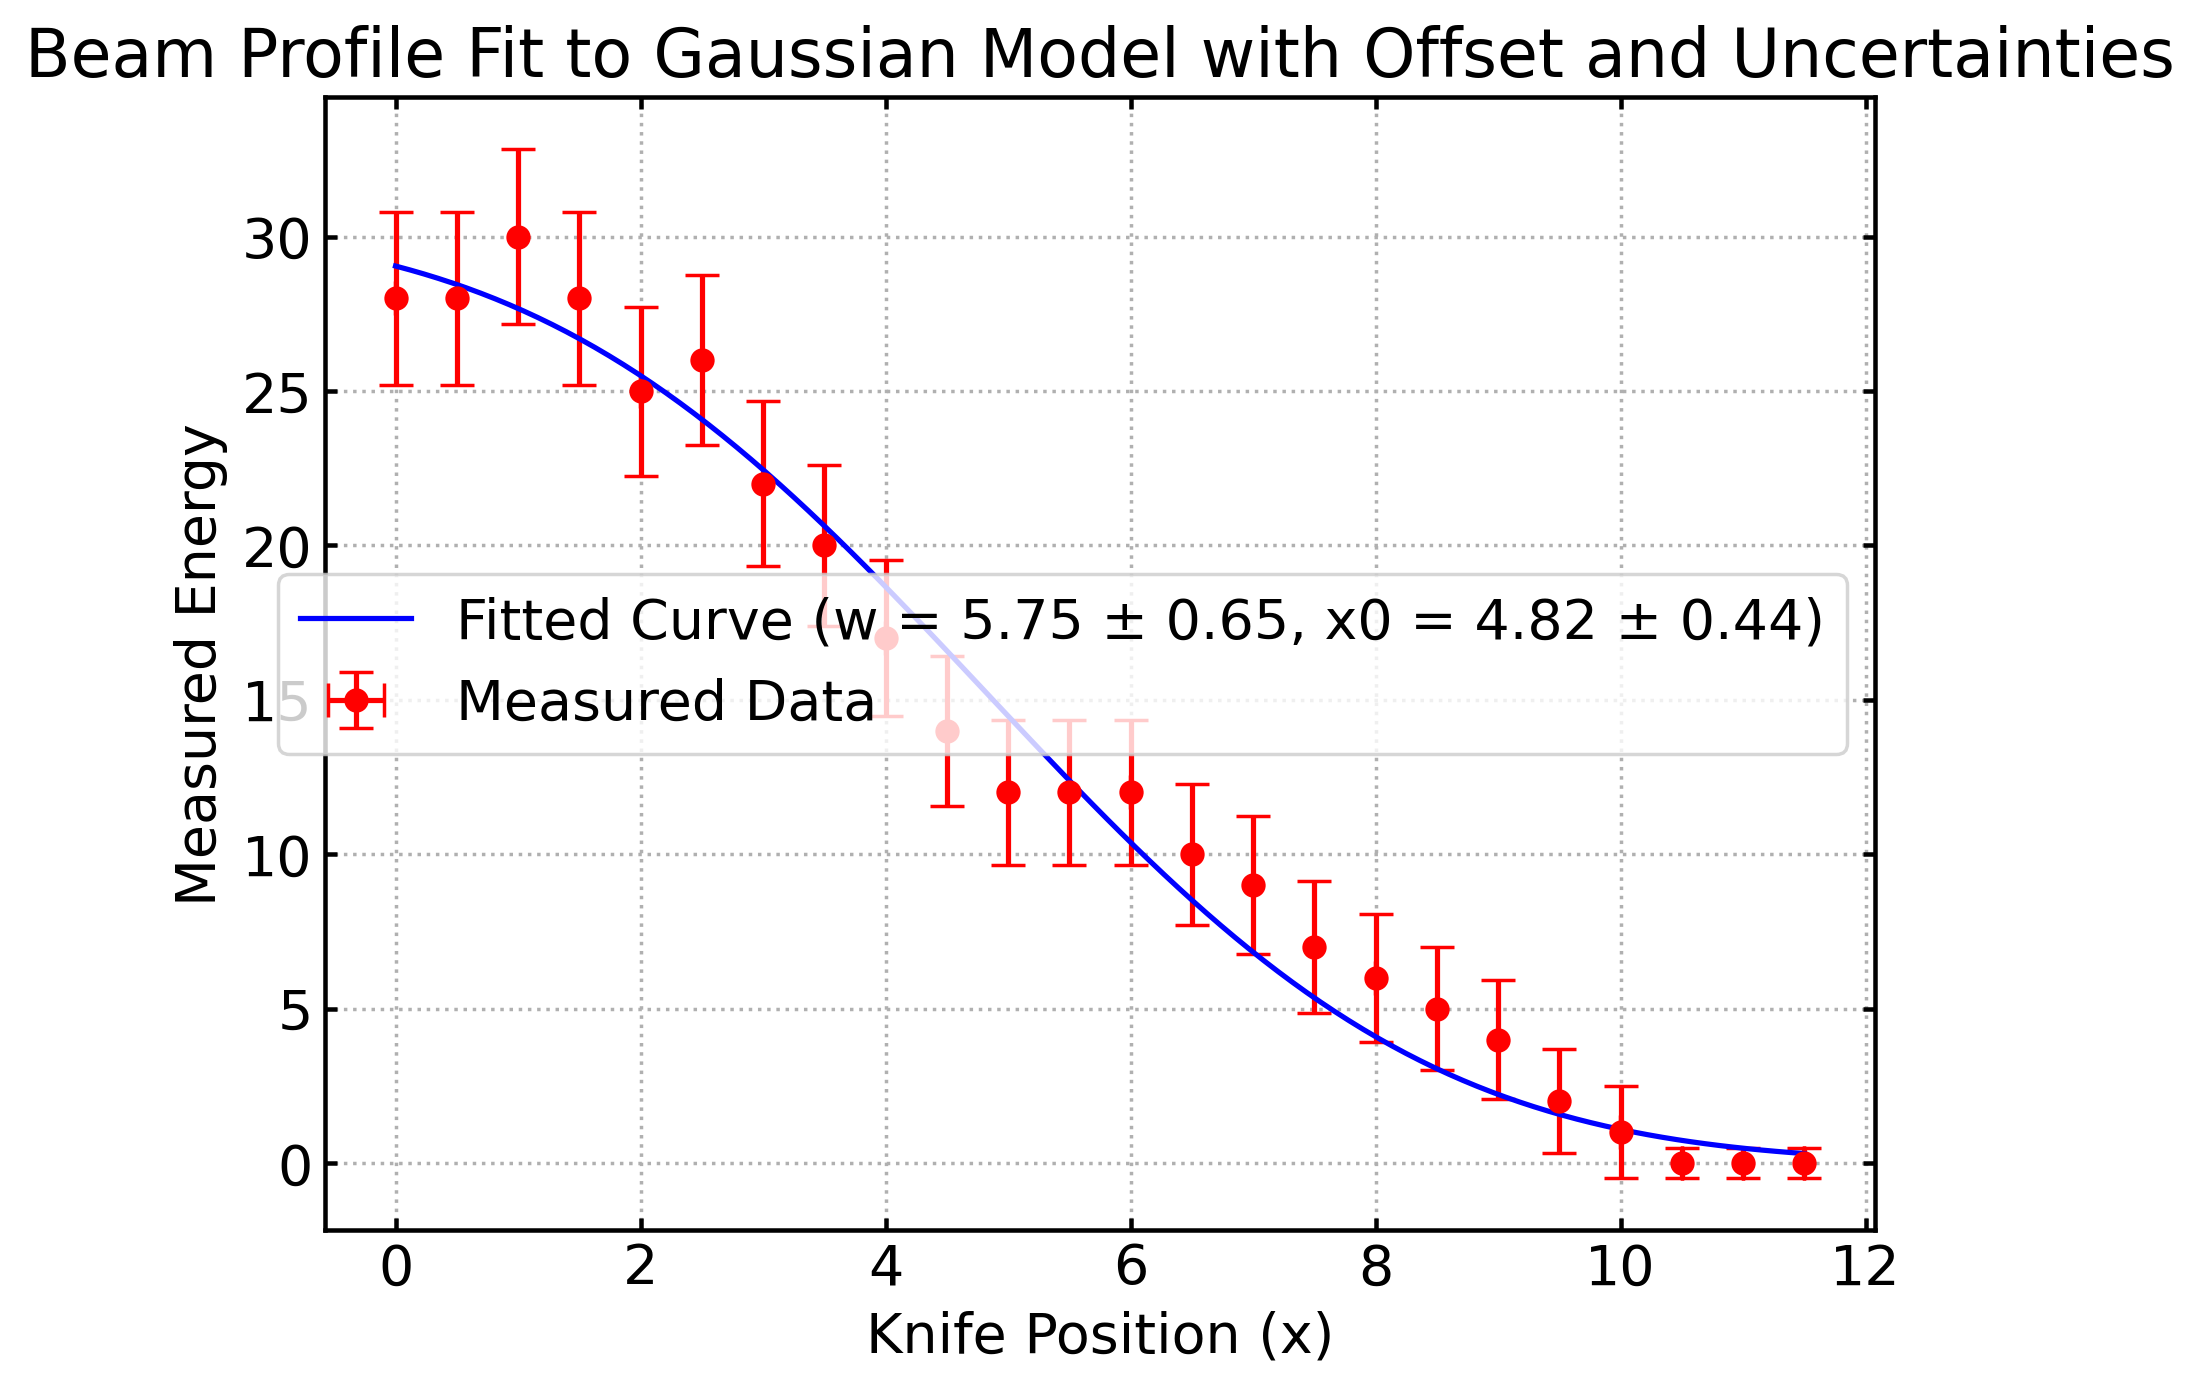

Fitted total energy (E_total): 16.763030723265203 ± 1.3621240783414283
Fitted beam waist (w): 5.512380815057925 ± 0.818859122900796
Fitted offset (x0): 6.454212038092915 ± 0.5056017235663944


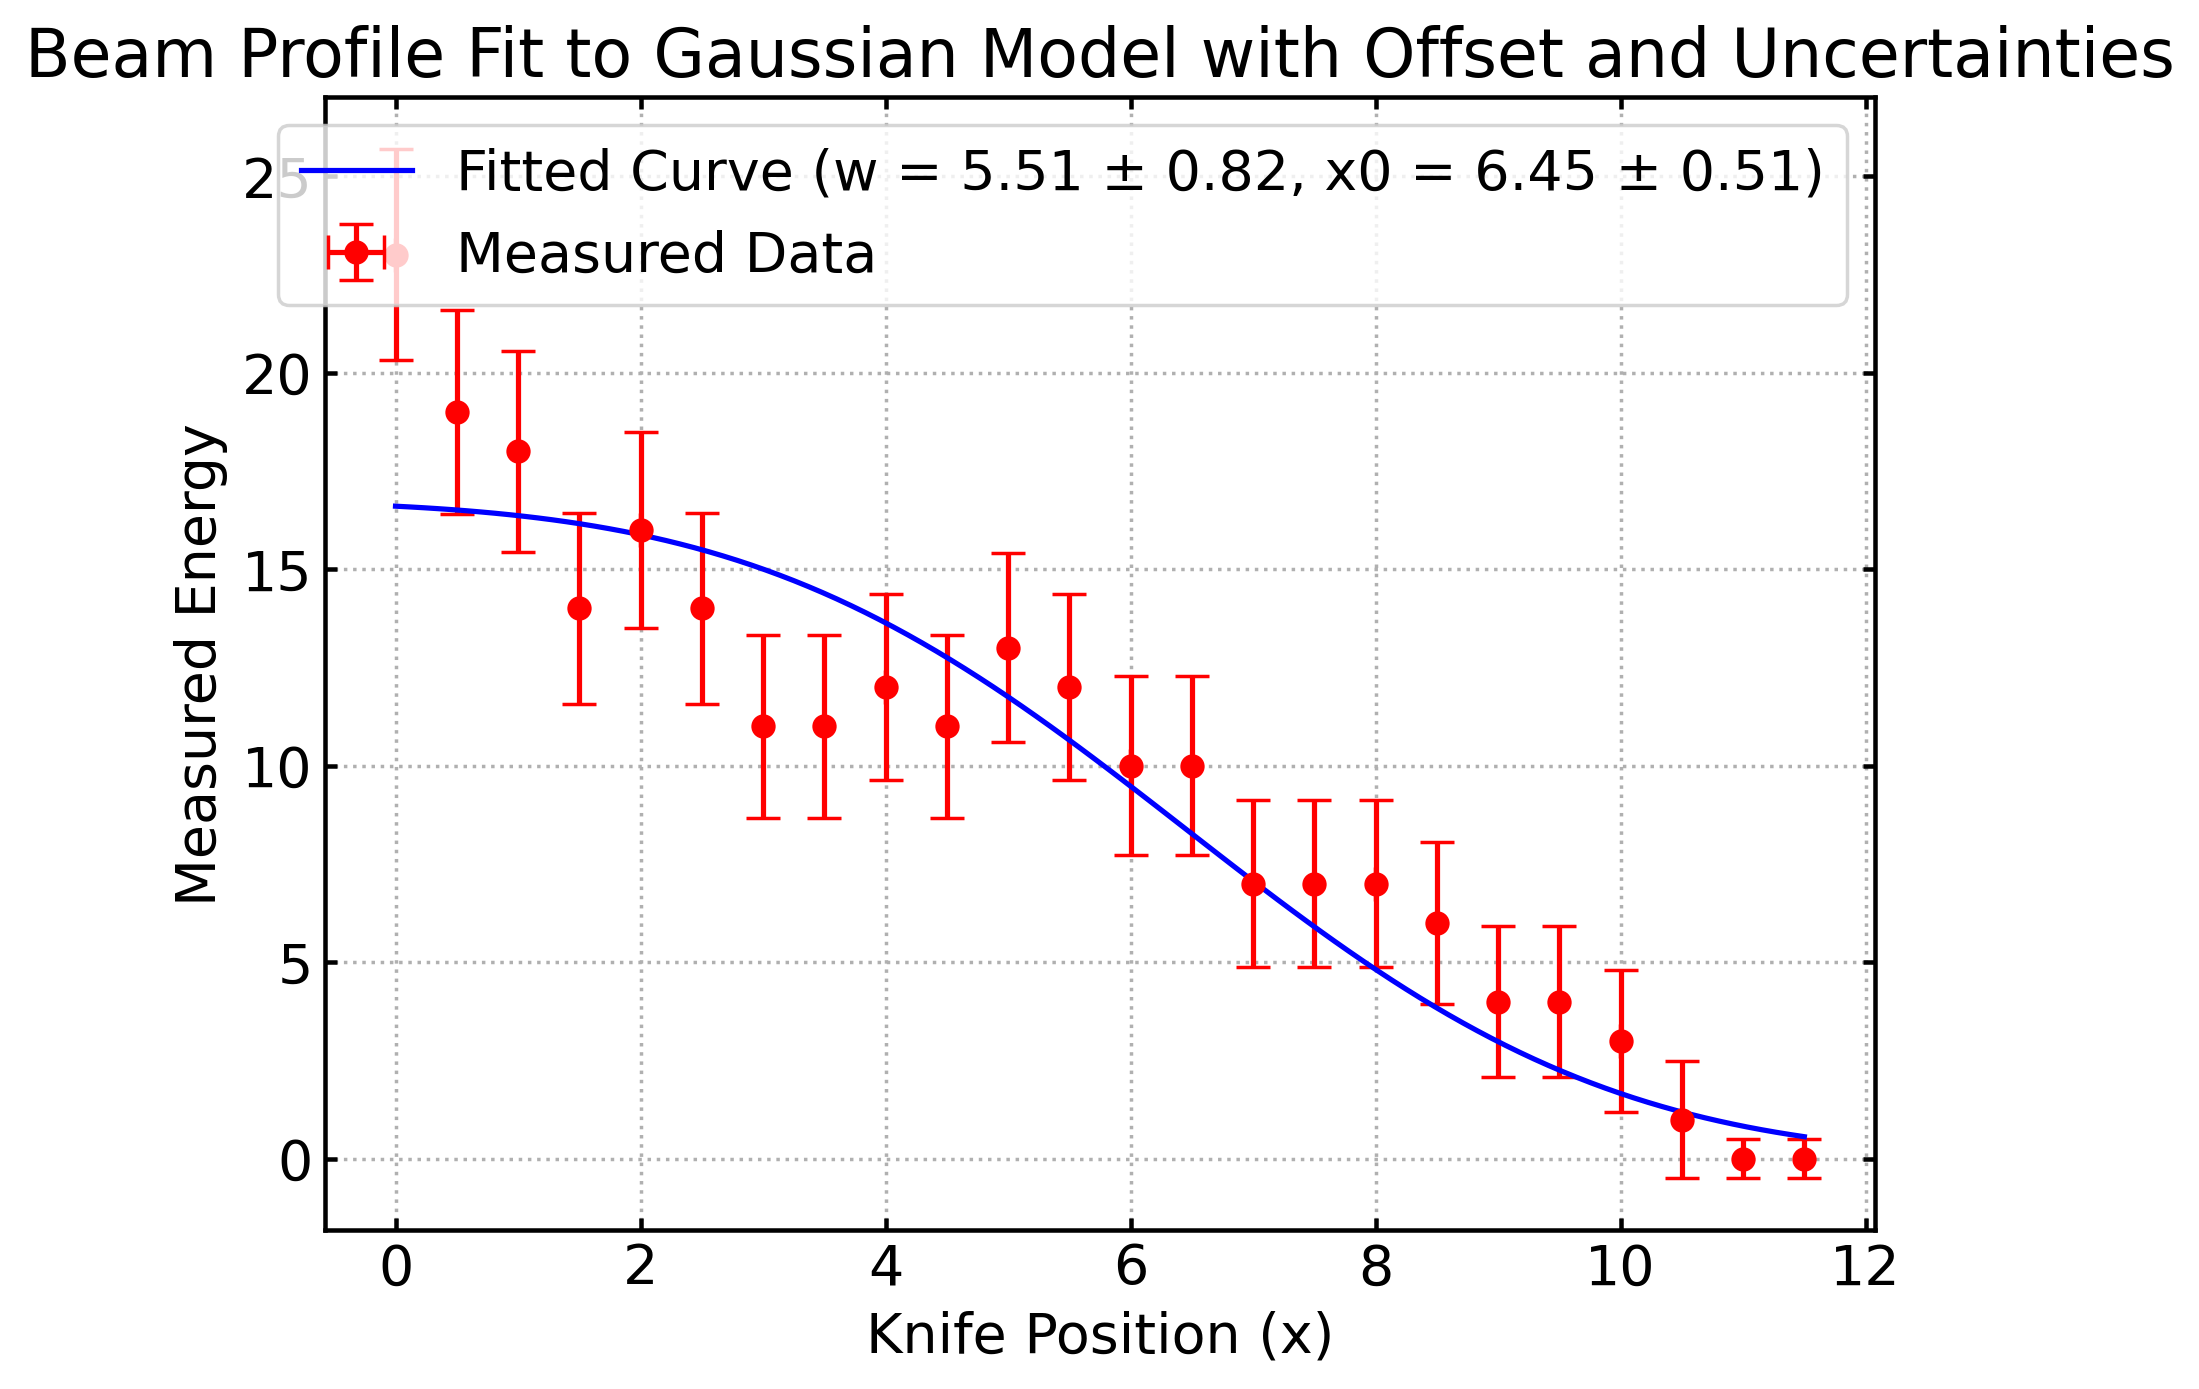

In [49]:

# Example data: Replace these with your actual data
for energys in energy_of_beam_lambda_3355_1_cm:
    # Measured energy at each knife position
    x = np.arange(0, len(energys) / 2, 0.5) 
    # Knife positions (in mm or other units)
    energy = np.array(energys)
    
    # Example uncertainties (replace these with your actual uncertainties)
    x_uncertainty = np.zeros(len(x)) + 0.001  # Knife position uncertainties (mm)
    energy_uncertainty = energy**(1/4) + 0.5 # Energy uncertainties

    # Define the Gaussian beam energy function with an offset
    def gaussian_energy_with_offset(x, E_total, w, x0):
        return E_total * 0.5 * (1 - erf(np.sqrt(2) * (x - x0) / w))

    # Initial guesses for total energy, beam waist, and offset
    initial_guesses = [max(energy), 1.0, 0.0]  # Guessing x0 = 0, adjust if necessary

    # Perform the curve fitting, using the energy uncertainty in the fit
    params, covariance = curve_fit(
        gaussian_energy_with_offset, x, energy, p0=initial_guesses,
        sigma=energy_uncertainty, absolute_sigma=True
    )

    # Extract the fit parameters and their uncertainties
    E_total_fit, w_fit, x0_fit = params
    perr = np.sqrt(np.diag(covariance))  # Parameter uncertainties (sqrt of diagonal covariance)
    E_total_err, w_err, x0_err = perr

    # Generate fitted curve for visualization
    x_fit = np.linspace(min(x), max(x), 100)
    energy_fit = gaussian_energy_with_offset(x_fit, E_total_fit, w_fit, x0_fit)

    # Print the fitted parameters with uncertainties
    print(f"Fitted total energy (E_total): {E_total_fit} ± {E_total_err}")
    print(f"Fitted beam waist (w): {w_fit} ± {w_err}")
    print(f"Fitted offset (x0): {x0_fit} ± {x0_err}")

    # Plot the fitted curve vs. measured data with uncertainties
    plt.figure(figsize=(8, 6))
    plt.errorbar(x, energy, yerr=energy_uncertainty, xerr=x_uncertainty, fmt='o', 
                 label='Measured Data', color='red', capsize=5)
    plt.plot(x_fit, energy_fit, 
             label=f'Fitted Curve (w = {w_fit:.2f} ± {w_err:.2f}, x0 = {x0_fit:.2f} ± {x0_err:.2f})',
             color='blue')
    plt.xlabel('Knife Position (x)')
    plt.ylabel('Measured Energy')
    plt.title('Beam Profile Fit to Gaussian Model with Offset and Uncertainties')
    plt.legend()
    plt.grid(True)
    plt.show()